# <center> FINAL PROJECT: STUDENT PERFORMANCE FACTORS <center> 

# A. INFORMATION

## I. Member Information


<center>

|No. | Name          | Student ID   | Email                    |
|:--:|:-------------:|:------------:|:------------------------:|
| 1  | Vo Hung Khoa  | 22127202     | vhkhoa22@clc.fitus.edu.vn|
| 2  | Vu Tuan Hung  | 22127137     | vthung22@clc.fitus.edu.vn|
| 3  | Huynh Tan Dat| 22127059     | htdat222@clc.fitus.edu.vn|

<center>

## II. Project Information 
### 1. Project Introduction 
- In this project, students are required to select a public dataset, such as those available on *Kaggle*, related to a topic of interest to their group. The project involves exploring the dataset, which often includes preprocessing steps, and identifying meaningful questions that can be answered using the data. Students are then tasked with preprocessing and analyzing the data to address each question effectively, demonstrating their ability to draw insights and conclusions from the analysis.

### 2. Topic
- The chosen topic: [**Student Performance Factors**](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)

- Using a dataset that covers study habits, attendance, parental involvement, and other factors, the project aims to analyze how these aspects impact students' exam performance.



## III. Team Member Evaluation

<center>

| No. | Team Member         | Completed Tasks                                                                                              | Task Completion (%) |
|:---:|:-------------------:|:----------------------------------------------------------------------------------------------------------- |:-------------------:|
|  1  | Vo Hung Khoa        | <div style="text-align: left;"> - Create a general structure for the Jupyter Notebook.<br>- Prepare the data: download, load, and preprocess the data.<br>- Formulate and answer research questions 4</div> | 100% |
|  2  | Huynh Tan Dat       | <div style="text-align: left;"> - Perform Exploratory Data Analysis (EDA).<br>- Formulate and answer research questions 3.</div>                                                       | 100% |
|  3  | Vu Tuan Hung        | <div style="text-align: left;"> - Formulate and answer research questions 1 & 2.<br>- Edit and synchronize the Jupyter notebook file structure.</div>                                               | 100% |

</center>


# B. Project Details

## I. Import Library and Read Dataset

### 1. Import Library 


Import the necessary libraries for data manipulation, visualization, and mathematical computations. These libraries provide essential functions for handling datasets and analyzing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
%matplotlib inline

# Import more library if you need it
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
import statsmodels.api as sm

### 2. Read Dataset

The dataset is loaded from a `CSV` file using `Pandas`. This allows us to work with the data as a `DataFrame`, making it easier to manipulate and analyze.

In [2]:
data =  pd.read_csv("./StudentPerformanceFactors.csv")
data.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

## II. Data Preprocessing

### **1. Handle Null and Duplicate Values**

#### *1.1. Data Overview*

To get a big-picture view of the data, we can use the `info()` function to display dataset information, including the **column names**, **data types**, **non-null counts**, and memory usage. This helps us identify any potential issues, such as **missing values** or **incorrect data types**.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**Comment**: There are some null values in the dataset, so we are going to drop them all.

#### *1.2. Handle Missing Values*
Missing values can introduce bias or errors in analysis. Rows with missing values are dropped to ensure the dataset is complete.

**Potential Issues Caused by Missing Values:**
- **Bias:** Missing data can lead to biased results if the absence of values is not random.
- **Reduced Sample Size:** Retaining rows with missing values reduces the effective size of the dataset, limiting the statistical power of analysis.
- **Errors in Machine Learning Models:** Models may fail to train or make incorrect predictions due to incomplete data.

**Conclusion:** Dropping rows with missing values ensures the dataset is reliable and suitable for downstream tasks.

In [4]:
# Drop null-value
data.dropna(axis = 0 , inplace=True)

In [5]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

**Comment:** There are **no null values** in the `dataset`, which indicates that we can confidently proceed to the next step in the preprocessing pipeline without concerns about incomplete data impacting our analysis.

#### *1.3. Remove Duplicate Rows*
Duplicate rows can distort analysis by giving undue weight to repeated data points. Duplicates are identified and removed to maintain data integrity.

**Why Remove Duplicates?**
- **Data Integrity:** Duplicate rows can skew the statistical distribution of data.
- **Accuracy in Machine Learning Models:** Repeated data points may cause models to overfit or misinterpret trends.
- **Efficiency:** Removing duplicates reduces computational overhead, especially in large datasets.

**Example:** If the same student's performance data is recorded multiple times, their scores may have undue influence on statistical summaries or model predictions.

To maintain the `accuracy` and `reliability` of the dataset, duplicates are **identified** and **removed.**


In [6]:
data.drop_duplicates(inplace=True)

### **2. Handle Categorical Columns**

#### *2.1. Overview* 

To complete the data preprocessing, we need to handle the object values and convert them into numeric values. First, we need to gain a deeper understanding of the dataset we are working with.

<center>

| Attribute                | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| Hours_Studied            | Number of hours spent studying per week.                                    |
| Attendance               | Percentage of classes attended.                                             |
| Parental_Involvement     | Level of parental involvement in the student's education (Low, Medium, High).|
| Access_to_Resources      | Availability of educational resources (Low, Medium, High).                 |
| Extracurricular_Activities| Participation in extracurricular activities (Yes, No).                      |
| Sleep_Hours              | Average number of hours of sleep per night.                                 |
| Previous_Scores          | Scores from previous exams.                                                 |
| Motivation_Level         | Student's level of motivation (Low, Medium, High).                          |
| Internet_Access          | Availability of internet access (Yes, No).                                  |
| Tutoring_Sessions        | Number of tutoring sessions attended per month.                             |
| Family_Income            | Family income level (Low, Medium, High).                                   |
| Teacher_Quality          | Quality of the teachers (Low, Medium, High).                               |
| School_Type              | Type of school attended (Public, Private).                                  |
| Peer_Influence           | Influence of peers on academic performance (Positive, Neutral, Negative).   |
| Physical_Activity        | Average number of hours of physical activity per week.                      |
| Learning_Disabilities    | Presence of learning disabilities (Yes, No).                               |
| Parental_Education_Level | Highest education level of parents (High School, College, Postgraduate).   |
| Distance_from_Home       | Distance from home to school (Near, Moderate, Far).                         |
| Gender                   | Gender of the student (Male, Female).                                       |
| Exam_Score               | Final exam score.                                                           |

<center>

#### *2.2. Convert Categorical Data Types to Numeric Data Types* 

**Why:** Numerical data allows statistical and machine learning algorithms to process the information effectively.

**Mappings used:**
- `Low`/`Medium`/`High` -> 0/1/2 (Ordinal mapping for levels)
- `High School`/`College`/`Postgraduate` -> 0/1/2 (Ordinal mapping for education levels)
- `Near`/`Moderate`/`Far` -> 0/1/2 (Ordinal mapping for distances)
- `Positive`/`Neutral`/`Negative` -> 2/1/0 (Ordinal mapping for sentiments)

**Step 1**: Define ordinal mappings for specific columns


In [7]:
# Define ordinal mappings for specific columns.

ordinal_mapping = {"Low": 0, "Medium": 1, "High": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(ordinal_mapping.keys()):  
        data[column] = data[column].map(ordinal_mapping)

education_mapping = {"High School": 0, "College": 1, "Postgraduate": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(education_mapping.keys()):  
        data[column] = data[column].map(education_mapping)

distance_mapping = {"Near": 0, "Moderate": 1, "Far": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(distance_mapping.keys()):  
        data[column] = data[column].map(distance_mapping)

sentiment_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(sentiment_mapping.keys()): 
        data[column] = data[column].map(sentiment_mapping)


**Step 2:** Handle remaining categorical columns with arbitrary unique values by encoding them as integers.


In [8]:
# Handle remaining categorical columns
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)

This ensures all categorical columns are numeric, even if they don’t follow an ordinal structure.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int64
 3   Access_to_Resources         6378 non-null   int64
 4   Extracurricular_Activities  6378 non-null   int64
 5   Sleep_Hours                 6378 non-null   int64
 6   Previous_Scores             6378 non-null   int64
 7   Motivation_Level            6378 non-null   int64
 8   Internet_Access             6378 non-null   int64
 9   Tutoring_Sessions           6378 non-null   int64
 10  Family_Income               6378 non-null   int64
 11  Teacher_Quality             6378 non-null   int64
 12  School_Type                 6378 non-null   int64
 13  Peer_Influence              6378 non-null   int64
 14  Physical_Acti

**Comment:** All columns are now correctly typed, ensuring compatibility for further processing and analysis. We are ready to proceed to the next steps!

### **3. Handle Outliers**


#### *3.1. Check Ouliers*

To validate a dataset, we can use the `describe()` function. This function is widely used to provide a summary of **key statistical** measures for the dataset, helping to quickly assess its quality and characteristics:

- `count`: The number of non-null values in the dataset.
- `mean`: The average of the values in the dataset.
- `std`: The standard deviation, which measures the spread of the data.
- `min`: The smallest value in the dataset.
- `25%`, `50%`, `75%`: The 25th, 50th (median), and 75th percentiles, which help to understand the distribution of the data.
- `max`: The largest value in the dataset.

These statistics help identify potential issues such as missing values, outliers, or skewed distributions, allowing for better data validation and preprocessing.

In [10]:
data.describe()

Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6378.000000  6378.000000            6378.00000          6378.000000   
mean       19.977109    80.020853               1.08545             1.098150   
std         5.985460    11.550723               0.69502             0.698635   
min         1.000000    60.000000               0.00000             0.000000   
25%        16.000000    70.000000               1.00000             1.000000   
50%        20.000000    80.000000               1.00000             1.000000   
75%        24.000000    90.000000               2.00000             2.000000   
max        44.000000   100.000000               2.00000             2.000000   

       Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
count                 6378.000000  6378.000000      6378.000000   
mean                     0.596896     7.034964        75.066165   
std                      0.490560     1.468033        14.400389   
min                      0.000000     4.000000        50.000000   
25%                      0.000000     6.000000        63.000000   
50%                      1.000000     7.000000        75.000000   
75%                      1.000000     8.000000        88.000000   
max                      1.000000    10.000000       100.000000   

       Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
count       6378.000000      6378.000000        6378.000000    6378.000000   
mean           0.907965         0.076043           1.495296       0.788021   
std            0.695758         0.265087           1.233984       0.743526   
min            0.000000         0.000000           0.000000       0.000000   
25%            0.000000         0.000000           1.000000       0.000000   
50%            1.000000         0.000000           1.000000       1.000000   
75%            1.000000         0.000000           2.000000       1.000000   
max            2.000000         1.000000           8.000000       2.000000   

       Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
count      6378.000000  6378.000000     6378.000000        6378.000000   
mean          1.197241     0.304798        1.191753           2.972719   
std           0.601064     0.460358        0.756394           1.028926   
min           0.000000     0.000000        0.000000           0.000000   
25%           1.000000     0.000000        1.000000           2.000000   
50%           1.000000     0.000000        1.000000           3.000000   
75%           2.000000     1.000000        2.000000           4.000000   
max           2.000000     1.000000        2.000000           6.000000   

       Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
count            6378.000000               6378.000000         6378.000000   
mean                0.104735                  0.705394            0.503763   
std                 0.306236                  0.780570            0.670442   
min                 0.000000                  0.000000            0.000000   
25%                 0.000000                  0.000000            0.000000   
50%                 0.000000                  1.000000            0.000000   
75%                 0.000000                  1.000000            1.000000   
max                 1.000000                  2.000000            2.000000   

            Gender   Exam_Score  
count  6378.000000  6378.000000  
mean      0.421762    67.252117  
std       0.493880     3.914217  
min       0.000000    55.000000  
25%       0.000000    65.000000  
50%       0.000000    67.000000  
75%       1.000000    69.000000  
max       1.000000   101.000000

**Comment:** In the `Exam_score` column, there is a value of **101**, which is outside the valid range `(0-100)`. To ensure data validity and consistency, it is necessary to remove or handle these invalid values by dropping them from the dataset. This process helps maintain the integrity of the data before further analysis. 

#### *3.2. Handle Scores*

Outliers in exam scores or previous scores can skew analysis. Scores outside this range are unrealistic and likely indicate data errors.

In [11]:
# Rows with scores outside the valid range (0-100) are removed.

data = data[(data["Exam_Score"] <= 100) & (data["Exam_Score"] >= 0)]
data = data[(data["Previous_Scores"] <= 100) & (data["Previous_Scores"] >= 0)]

In [12]:
# Double-check to ensure everything is ready for the next step.
data.describe()

Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6377.000000  6377.000000           6377.000000          6377.000000   
mean       19.976008    80.018034              1.085620             1.098165   
std         5.985283    11.549434              0.694942             0.698689   
min         1.000000    60.000000              0.000000             0.000000   
25%        16.000000    70.000000              1.000000             1.000000   
50%        20.000000    80.000000              1.000000             1.000000   
75%        24.000000    90.000000              2.000000             2.000000   
max        44.000000   100.000000              2.000000             2.000000   

       Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
count                 6377.000000  6377.000000      6377.000000   
mean                     0.596832     7.035126        75.063353   
std                      0.490572     1.468091        14.399766   
min                      0.000000     4.000000        50.000000   
25%                      0.000000     6.000000        63.000000   
50%                      1.000000     7.000000        75.000000   
75%                      1.000000     8.000000        88.000000   
max                      1.000000    10.000000       100.000000   

       Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
count       6377.000000      6377.000000        6377.000000    6377.000000   
mean           0.908107         0.075898           1.494747       0.787831   
std            0.695720         0.264855           1.233300       0.743430   
min            0.000000         0.000000           0.000000       0.000000   
25%            0.000000         0.000000           1.000000       0.000000   
50%            1.000000         0.000000           1.000000       1.000000   
75%            1.000000         0.000000           2.000000       1.000000   
max            2.000000         1.000000           8.000000       2.000000   

       Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
count      6377.000000  6377.000000     6377.000000        6377.000000   
mean          1.197115     0.304846        1.191626           2.972714   
std           0.601027     0.460378        0.756386           1.029006   
min           0.000000     0.000000        0.000000           0.000000   
25%           1.000000     0.000000        1.000000           2.000000   
50%           1.000000     0.000000        1.000000           3.000000   
75%           2.000000     1.000000        2.000000           4.000000   
max           2.000000     1.000000        2.000000           6.000000   

       Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
count            6377.000000               6377.000000         6377.000000   
mean                0.104751                  0.705504            0.503685   
std                 0.306257                  0.780581            0.670465   
min                 0.000000                  0.000000            0.000000   
25%                 0.000000                  0.000000            0.000000   
50%                 0.000000                  1.000000            0.000000   
75%                 0.000000                  1.000000            1.000000   
max                 1.000000                  2.000000            2.000000   

            Gender   Exam_Score  
count  6377.000000  6377.000000  
mean      0.421672    67.246825  
std       0.493865     3.891637  
min       0.000000    55.000000  
25%       0.000000    65.000000  
50%       0.000000    67.000000  
75%       1.000000    69.000000  
max       1.000000   100.000000

All columns are well-formatted, so now we can move on to the next step!

#### *3.3. Save Cleaned Dataset*

Save the cleaned and preprocessed dataset to a new `CSV` file for future use.

In [13]:
# Save the cleaned and preprocessed dataset to a new CSV file for future use.
data.to_csv("./StudentPerformanceFactors_Cleaned.csv", index=False)

## III. Exploratory Data Analysis - EDA

### **1. Overall**

In [14]:
# Install necessary libs
# !pip install numba==0.53.1
# !pip install ydata-profiling
# !pip install visions --upgrade
# !pip install ydata-profiling --upgrade

In [15]:
data = pd.read_csv('./StudentPerformanceFactors_Cleaned.csv')
profile = ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **2. Additional Visualizations**

To gain deeper insights into the factors affecting student performance, we will create additional visualizations. These visualizations will help us understand the relationships between various factors and the final exam scores.

#### *2.1. Distribution of Exam Scores*

First, let's visualize the distribution of exam scores to understand the overall performance of students.


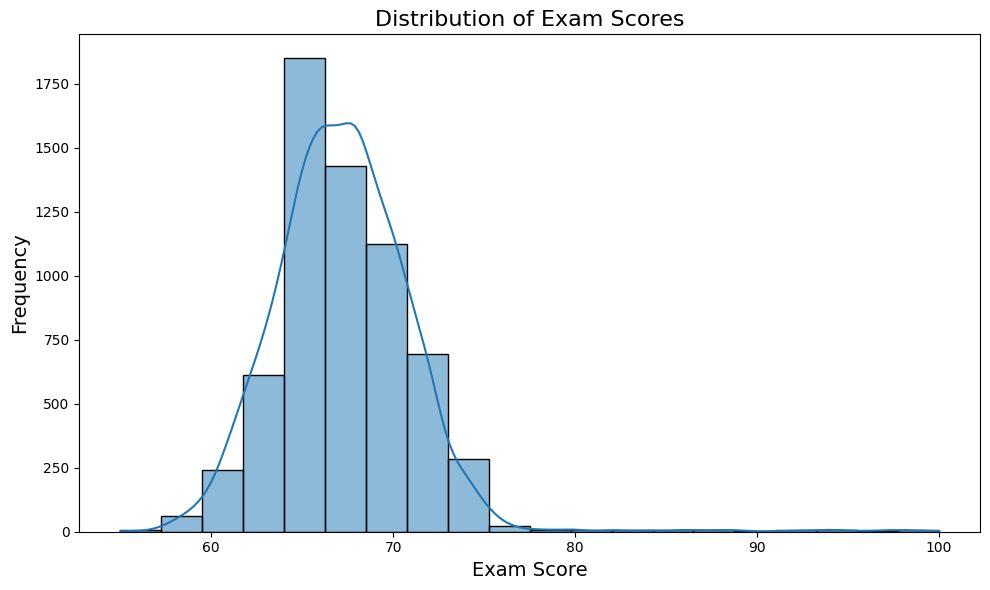

In [16]:
# Visualize the distribution of Exam Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Exam_Score'], bins=20, kde=True)
plt.title('Distribution of Exam Scores', fontsize=16)
plt.xlabel('Exam Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

#### *2.2. Visualizing the Distribution of Categorical Attributes*

To further understand the dataset, we visualize the distribution of various categorical attributes. This helps us identify any imbalances or patterns in the data that could influence our analysis. The following plot shows the distribution of each categorical attribute in the dataset.

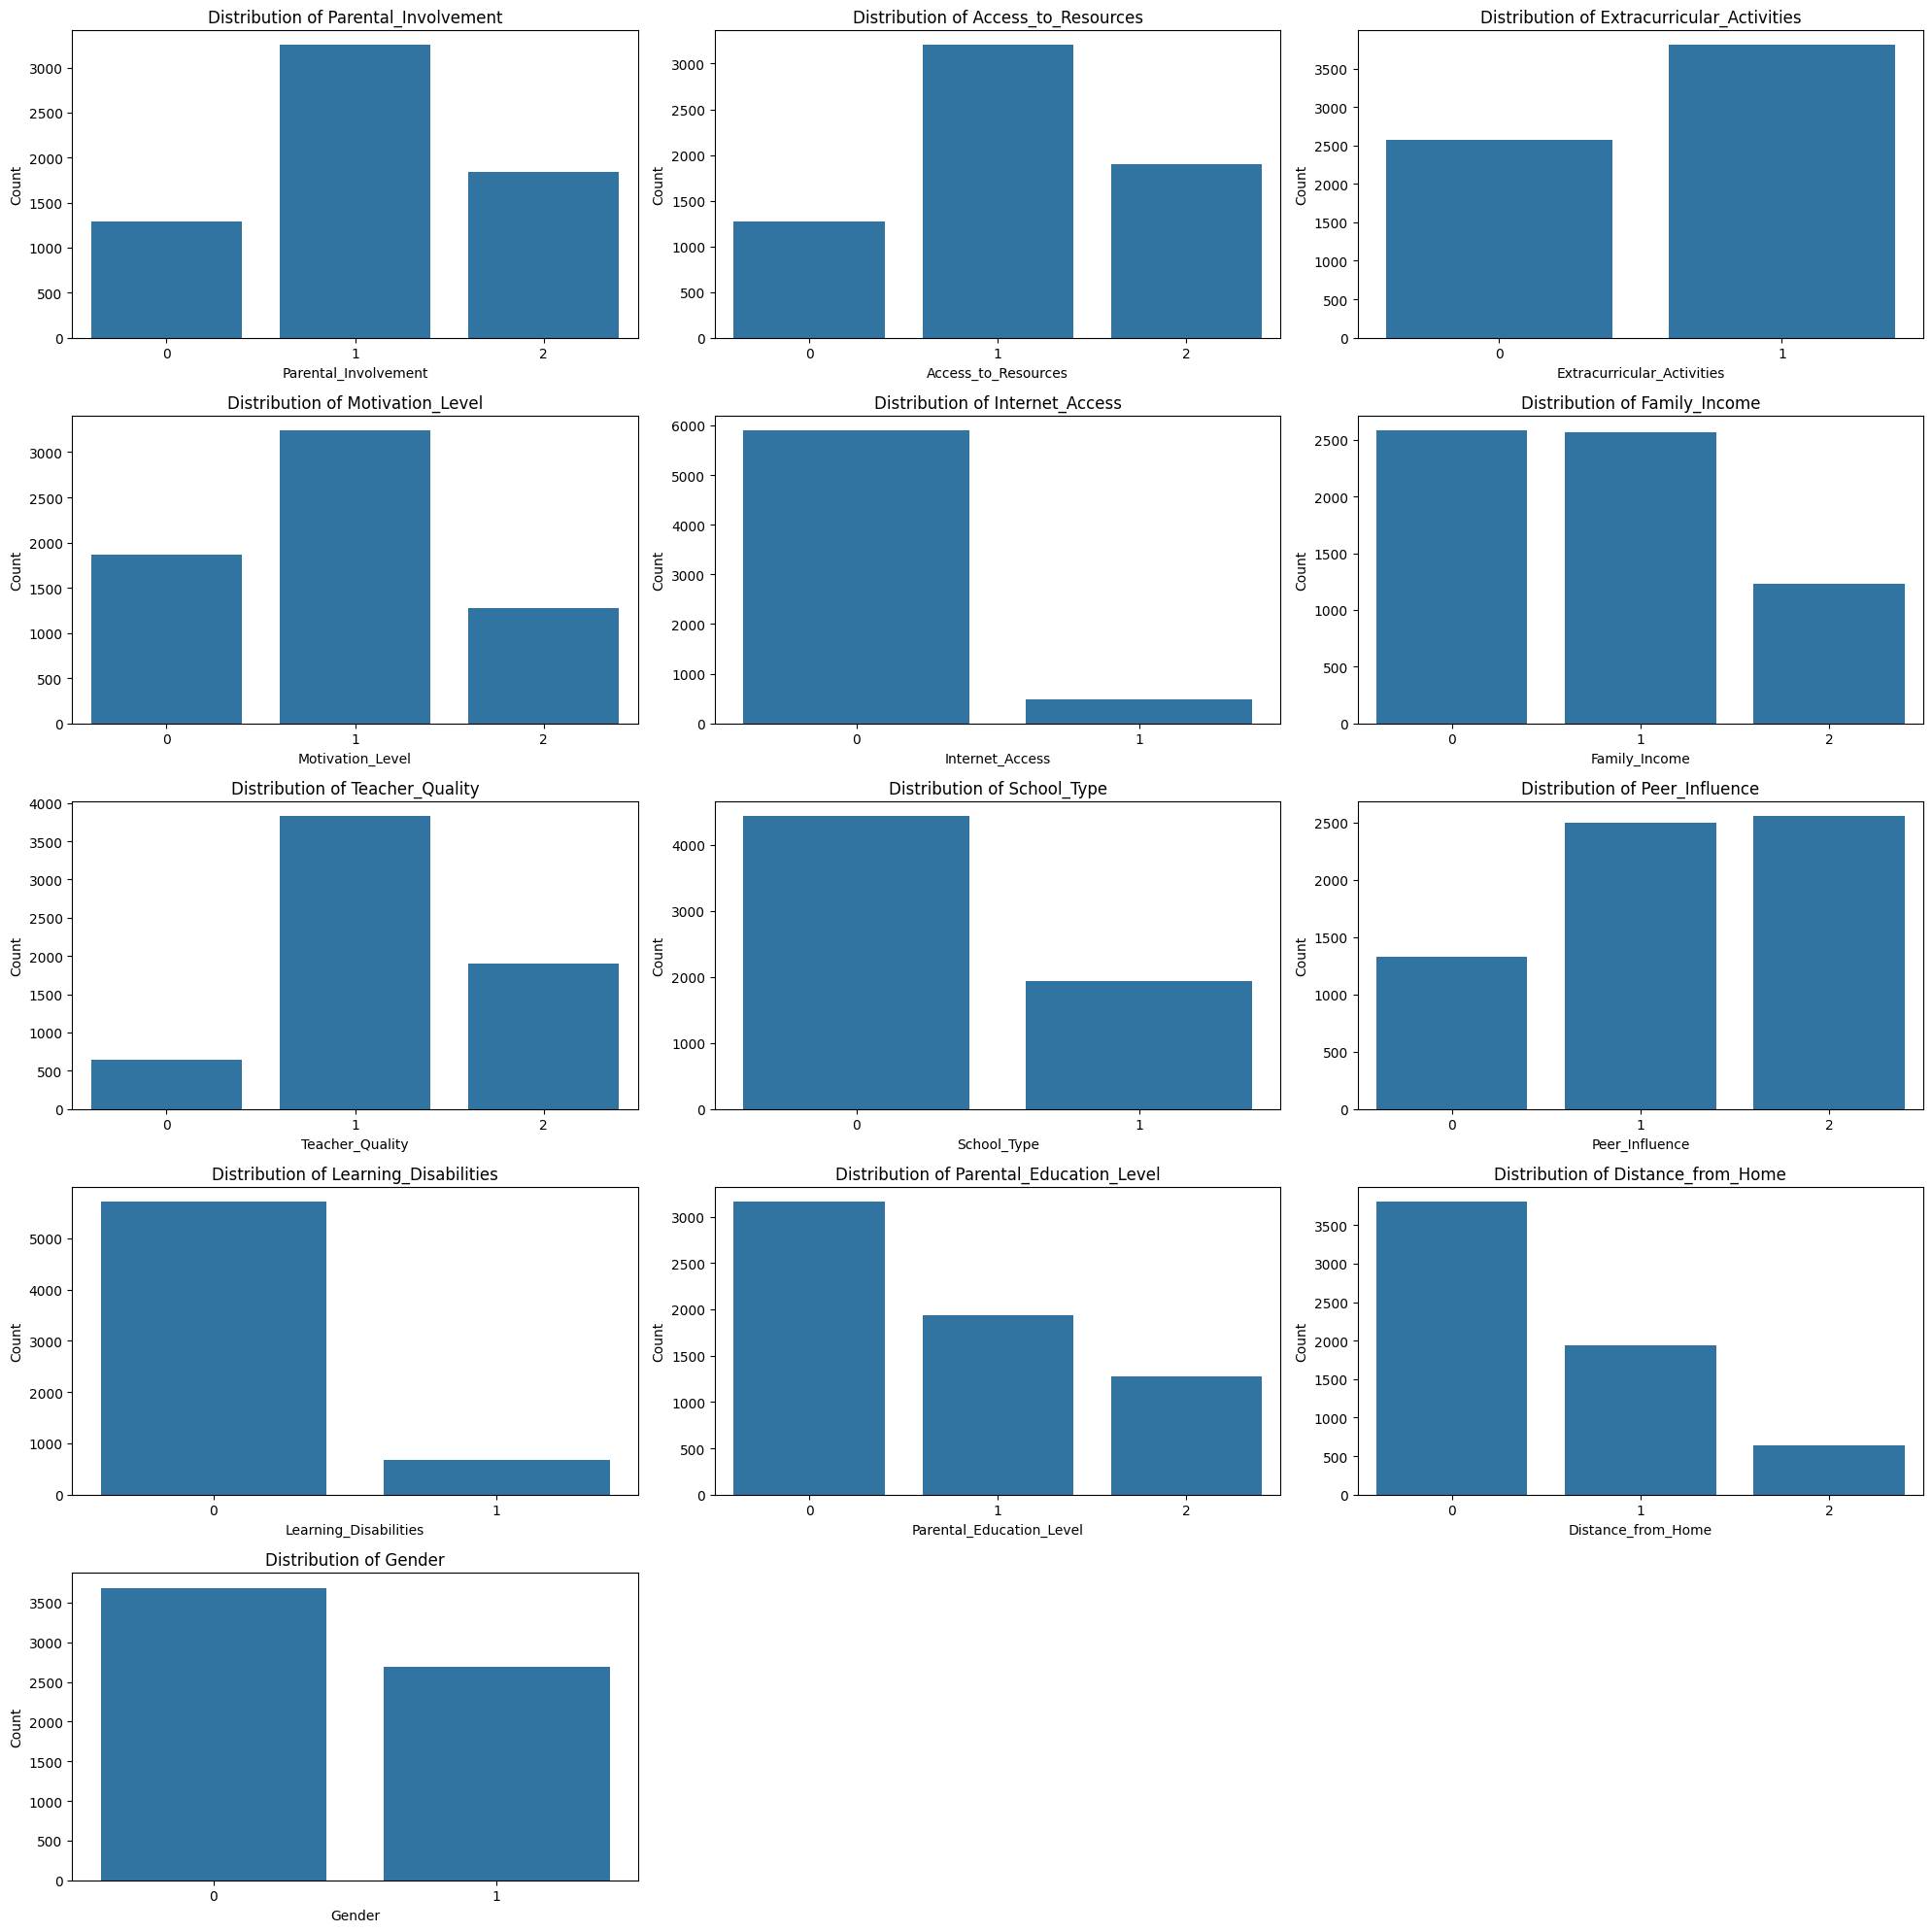

In [17]:
# Visualize all categorical attributes
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
                         'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
                         'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### *2.3. Correlation Table and Visualization*

To better understand the relationships between different variables in our dataset, we will create a correlation table and visualize it using a heatmap. This will help us identify which factors are most strongly associated with exam scores and other key attributes.

In [18]:
# Ensure the correlations variable is defined
correlations = data.corr()

# Display the correlation coefficients as a DataFrame
correlation_df = correlations.reset_index()
correlation_df

index  Hours_Studied  Attendance  \
0                Hours_Studied       1.000000   -0.005285   
1                   Attendance      -0.005285    1.000000   
2         Parental_Involvement      -0.014626   -0.007931   
3          Access_to_Resources      -0.003750   -0.012289   
4   Extracurricular_Activities      -0.008530   -0.001955   
5                  Sleep_Hours       0.013251   -0.019434   
6              Previous_Scores       0.022268   -0.018393   
7             Motivation_Level      -0.011151   -0.002253   
8              Internet_Access      -0.007063    0.018574   
9            Tutoring_Sessions      -0.010184    0.011386   
10               Family_Income       0.000971   -0.012195   
11             Teacher_Quality      -0.007143   -0.002049   
12                 School_Type      -0.001045    0.021148   
13              Peer_Influence       0.008326   -0.006895   
14           Physical_Activity       0.003179   -0.022987   
15       Learning_Disabilities      -0.013859   -0.020798   
16    Parental_Education_Level      -0.007824    0.026632   
17          Distance_from_Home       0.017121   -0.020597   
18                      Gender       0.006978   -0.004908   
19                  Exam_Score       0.446174    0.581664   

    Parental_Involvement  Access_to_Resources  Extracurricular_Activities  \
0              -0.014626            -0.003750                   -0.008530   
1              -0.007931            -0.012289                   -0.001955   
2               1.000000            -0.029264                   -0.022483   
3              -0.029264             1.000000                   -0.012179   
4              -0.022483            -0.012179                    1.000000   
5              -0.004639            -0.013607                    0.003116   
6              -0.020760             0.024246                    0.002506   
7              -0.023624             0.006945                    0.015966   
8              -0.014009             0.017364                    0.003782   
9              -0.002403            -0.014872                    0.005961   
10              0.010881            -0.004886                   -0.005799   
11              0.014785            -0.011725                    0.015310   
12              0.014488             0.025923                   -0.006418   
13              0.020699            -0.002065                    0.008737   
14             -0.005505            -0.012853                   -0.001600   
15              0.007963            -0.005552                   -0.011153   
16             -0.007577            -0.005362                    0.003625   
17             -0.004043             0.000232                    0.013816   
18              0.016802            -0.002257                   -0.007692   
19              0.159087             0.169035                    0.062319   

    Sleep_Hours  Previous_Scores  Motivation_Level  Internet_Access  ...  \
0      0.013251         0.022268         -0.011151        -0.007063  ...   
1     -0.019434        -0.018393         -0.002253         0.018574  ...   
2     -0.004639        -0.020760         -0.023624        -0.014009  ...   
3     -0.013607         0.024246          0.006945         0.017364  ...   
4      0.003116         0.002506          0.015966         0.003782  ...   
5      1.000000        -0.023104          0.000550        -0.011698  ...   
6     -0.023104         1.000000          0.007156        -0.003934  ...   
7      0.000550         0.007156          1.000000        -0.020874  ...   
8     -0.011698        -0.003934         -0.020874         1.000000  ...   
9     -0.011159        -0.013723          0.006018         0.007943  ...   
10    -0.015875        -0.016867          0.008390         0.000549  ...   
11     0.010282        -0.003002         -0.012562        -0.002368  ...   
12    -0.000762        -0.012188         -0.013887         0.010875  ...   
13    -0.017503        -0.020396          0.001578         0.

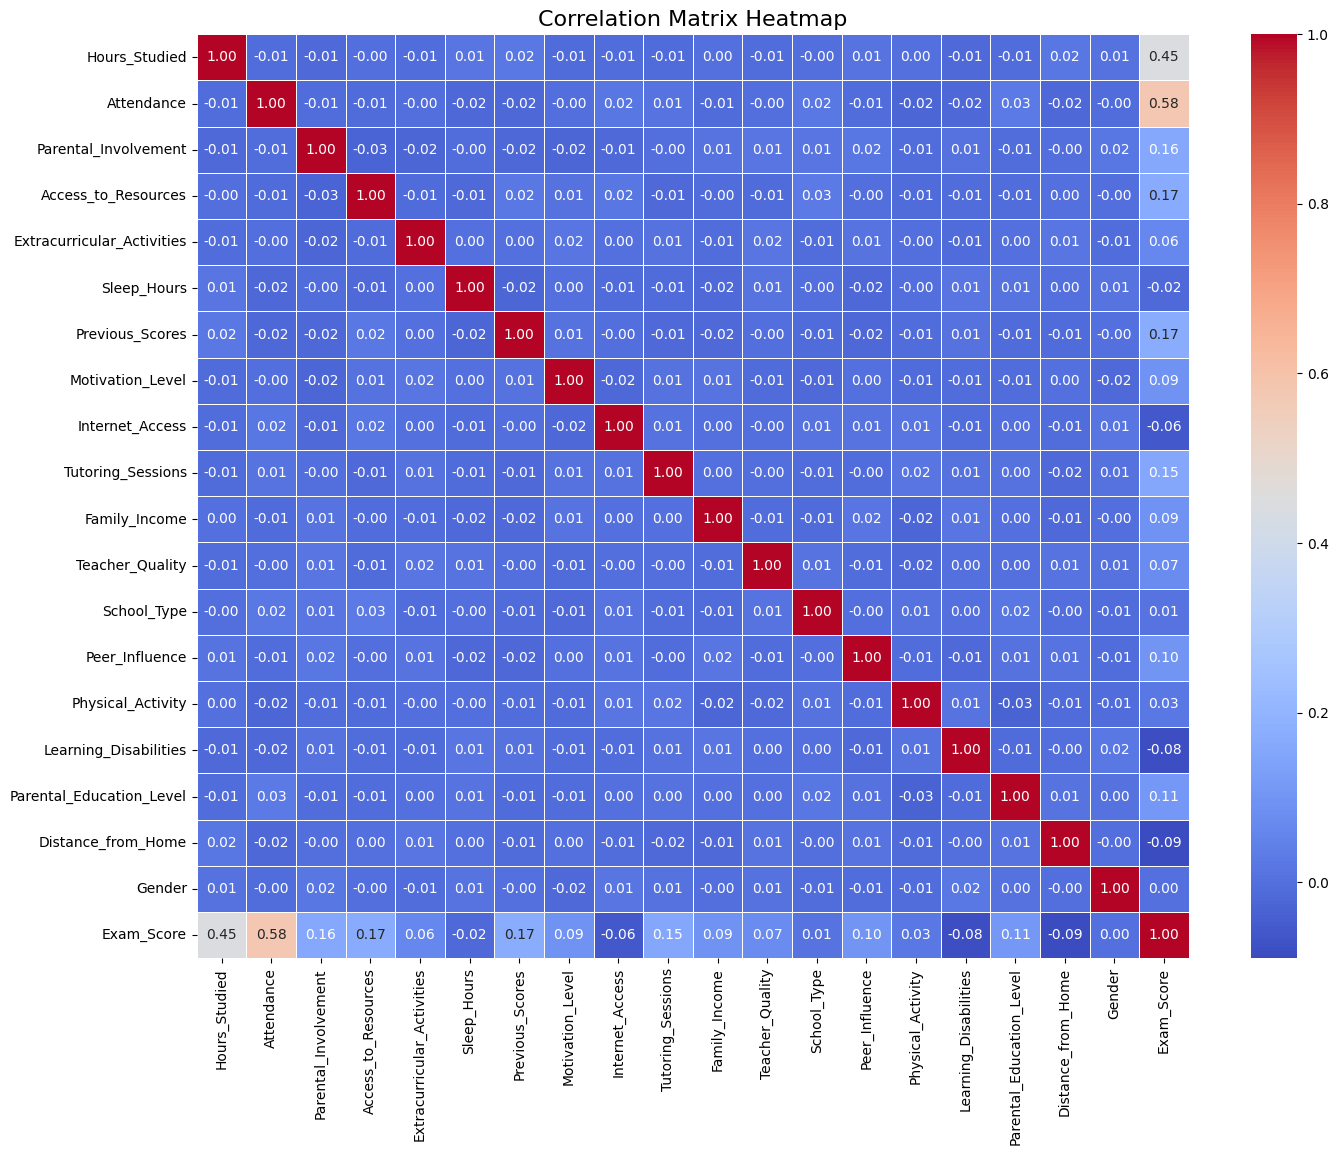

In [19]:
# Encode categorical columns
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['category']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

#### *2.4. Exploring the Relationship between Exam Scores and Key Factors*

To gain deeper insights into how certain factors impact exam performance, we use box plots to analyze the relationship between Exam_Score and two crucial predictors:

- `Hours Studied`: This helps identify the variability of exam scores across different levels of study time.
- `Attendance`: This explores whether attending more classes correlates with better performance.

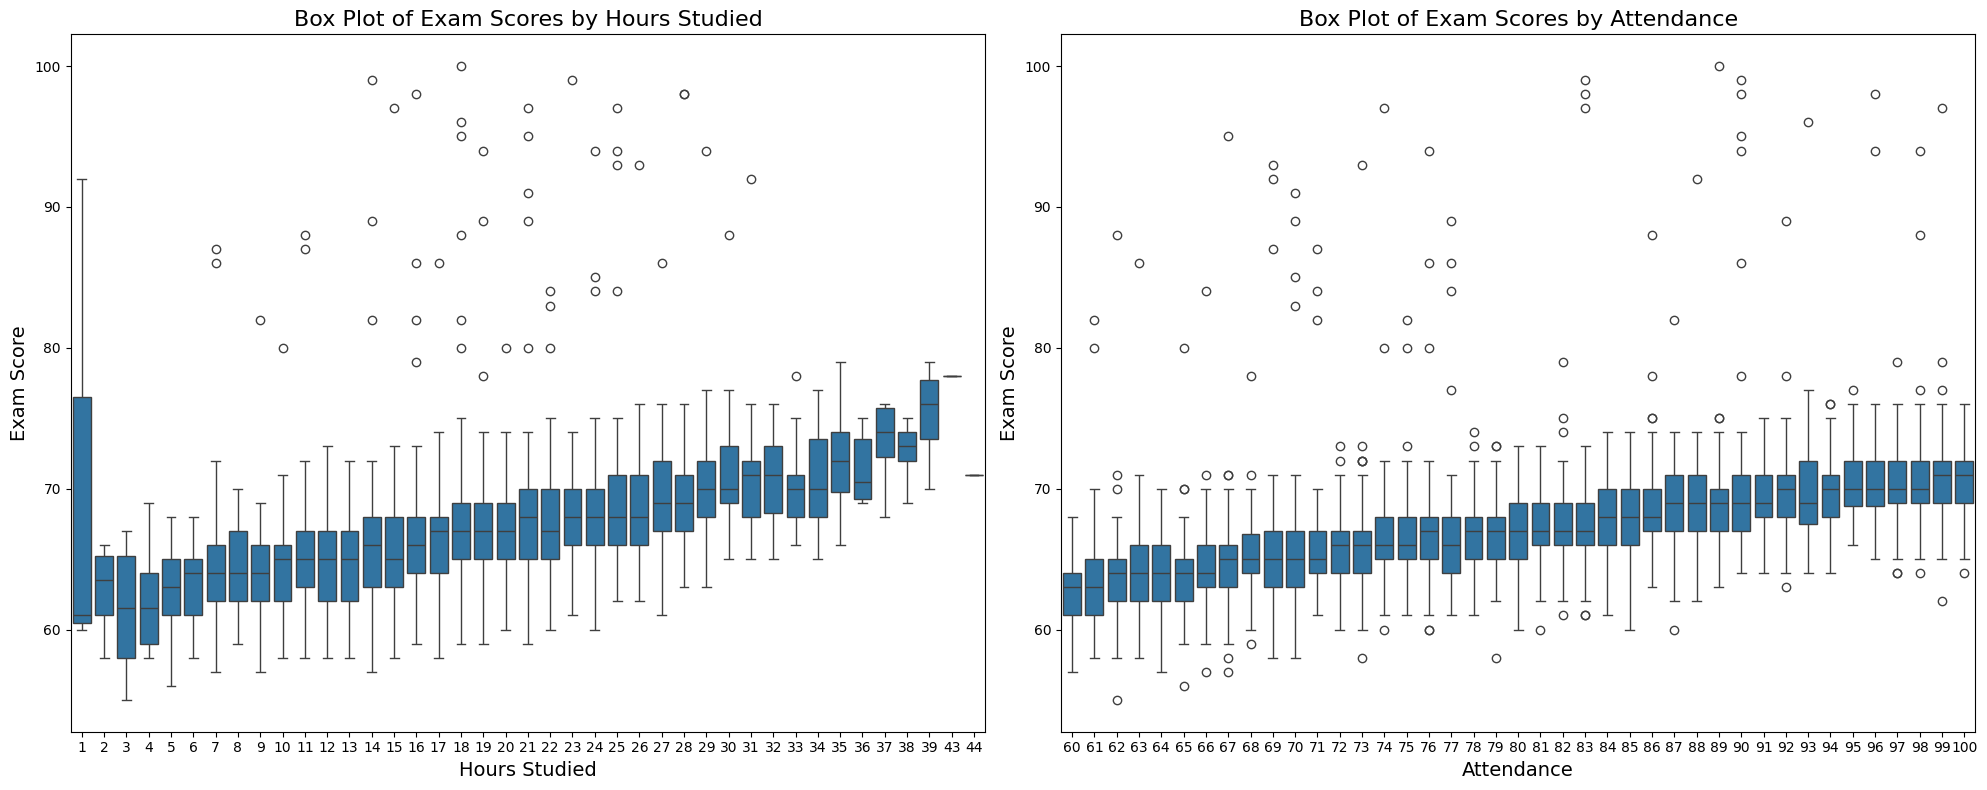

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

# Box Plot cho yếu tố 'Hours_Studied'
sns.boxplot(data=data, x='Hours_Studied', y='Exam_Score', ax=axes[0])
axes[0].set_title('Box Plot of Exam Scores by Hours Studied', fontsize=16)
axes[0].set_xlabel('Hours Studied', fontsize=14)
axes[0].set_ylabel('Exam Score', fontsize=14)

# Box Plot cho yếu tố 'Attendance'
sns.boxplot(data=data, x='Attendance', y='Exam_Score', ax=axes[1])
axes[1].set_title('Box Plot of Exam Scores by Attendance', fontsize=16)
axes[1].set_xlabel('Attendance', fontsize=14)
axes[1].set_ylabel('Exam Score', fontsize=14)

plt.tight_layout()
plt.show()

By comparing these two factors side-by-side, we can identify potential trends and relationships that might inform further analysis or predictive modeling.

#### *2.5. Pair Plot Analysis of Continuous Variables*

To better understand the relationships and interactions among continuous variables, a pair plot is generated for the following features: `Hours_Studied`, `Attendance`, `Previous_Scores`, `Exam_Score`

<Figure size 1600x1200 with 0 Axes>

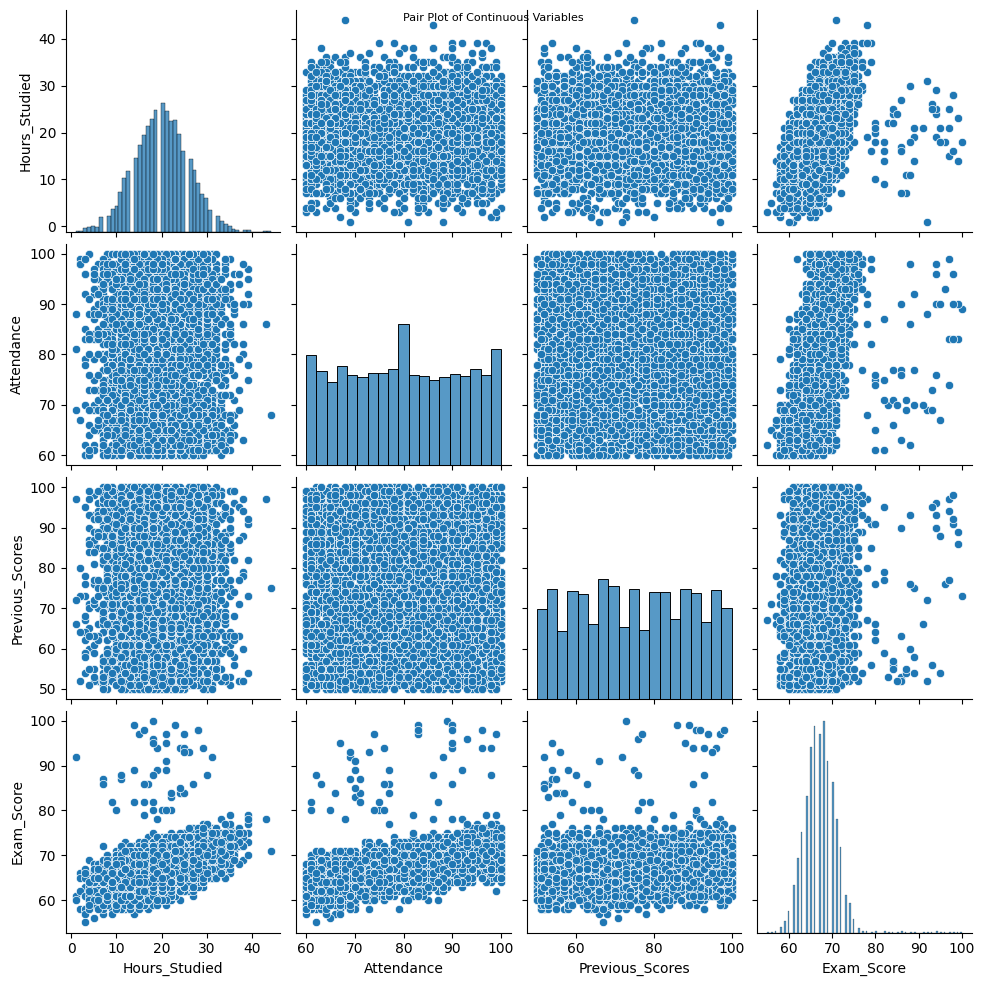

In [21]:
plt.figure(figsize=(16, 12))
sns.pairplot(data[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']])
plt.suptitle('Pair Plot of Continuous Variables', fontsize=8)
plt.show();

This visualization gives a holistic view of the continuous variables, allowing us to spot trends such as whether higher attendance or prior scores consistently lead to better exam outcomes. It serves as a foundation for determining which variables to prioritize in further modeling and analysis.

## IV. Ask Meaningful Question

### **Question 1: Which factors (e.g., Hours_Studied, Motivation_Level) have the strongest correlation with Exam_Score?**

#### **Why Answer This Question?**
- **Identifying Key Influences**: This question helps determine which factors have the strongest impact on exam performance, guiding targeted interventions to improve student outcomes.
- **Resource Prioritization**: Understanding these relationships is practical for prioritizing resources and focusing efforts on the most impactful variables.

#### **What Will Be Gained?**
- A ranked list of factors based on their correlation with **Exam_Score**.
- Insights into relationships between key features like **Hours_Studied**, **Motivation_Level**, and **Exam_Score**.

#### **Steps to Answer:**
1. **Correlation Analysis**:
   - Calculate correlation coefficients (e.g., Pearson, Spearman) between independent variables and **Exam_Score**.

2. **Feature Importance**:
   - Use regression models or feature importance techniques (e.g., Random Forest, Gradient Boosting) to determine key predictors.

3. **Visualization**:
   - Create visual representations (e.g., heatmaps, bar charts) to clearly compare the impact of each factor.

#### **Answer question**
Before we dive deeper into identifying which factors influence Exam_Score the most, we start by understanding the relationships between all variables and our target variable. To achieve this, we calculate the correlation coefficients using two methods: Pearson and Spearman. Pearson correlation helps us uncover linear relationships, while Spearman correlation is particularly useful for non-linear relationships.

However, our dataset contains categorical variables (e.g., Gender, School_Type) that need to be converted into numerical format before we calculate correlations. To do this, we use Label Encoding, which assigns a numeric value to each category. Once the data is prepared, we compute both Pearson and Spearman correlations for all features in the dataset. Finally, we visualize the results using bar plots, which allow us to quickly identify which factors are most strongly correlated with exam performance.

In [22]:
# Make a copy of the dataset to avoid modifying the original data
data_encoded = data.copy()

# Encode categorical variables
categorical_columns = data_encoded.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

# Calculate Pearson and Spearman correlations
correlation_pearson = data_encoded.corr(method='pearson')['Exam_Score'].sort_values(ascending=False)
correlation_spearman = data_encoded.corr(method='spearman')['Exam_Score'].sort_values(ascending=False)

# Display the top factors by correlation
print("Top Pearson Correlations with Exam_Score:")
print(correlation_pearson)

print("\nTop Spearman Correlations with Exam_Score:")
print(correlation_spearman)


Top Pearson Correlations with Exam_Score:
Exam_Score                    1.000000
Attendance                    0.581664
Hours_Studied                 0.446174
Previous_Scores               0.173635
Access_to_Resources           0.169035
Parental_Involvement          0.159087
Tutoring_Sessions             0.153986
Parental_Education_Level      0.107108
Peer_Influence                0.098271
Family_Income                 0.092913
Motivation_Level              0.090809
Teacher_Quality               0.073742
Extracurricular_Activities    0.062319
Physical_Activity             0.025260
School_Type                   0.011833
Gender                        0.003369
Sleep_Hours                  -0.016314
Internet_Access              -0.056219
Learning_Disabilities        -0.083941
Distance_from_Home           -0.089611
Name: Exam_Score, dtype: float64

Top Spearman Correlations with Exam_Score:
Exam_Score                    1.000000
Attendance                    0.673974
Hours_Studied          

With the correlations calculated, we can now visualize the results to better interpret the strength of these relationships.

**Visualize Pearson correlations**

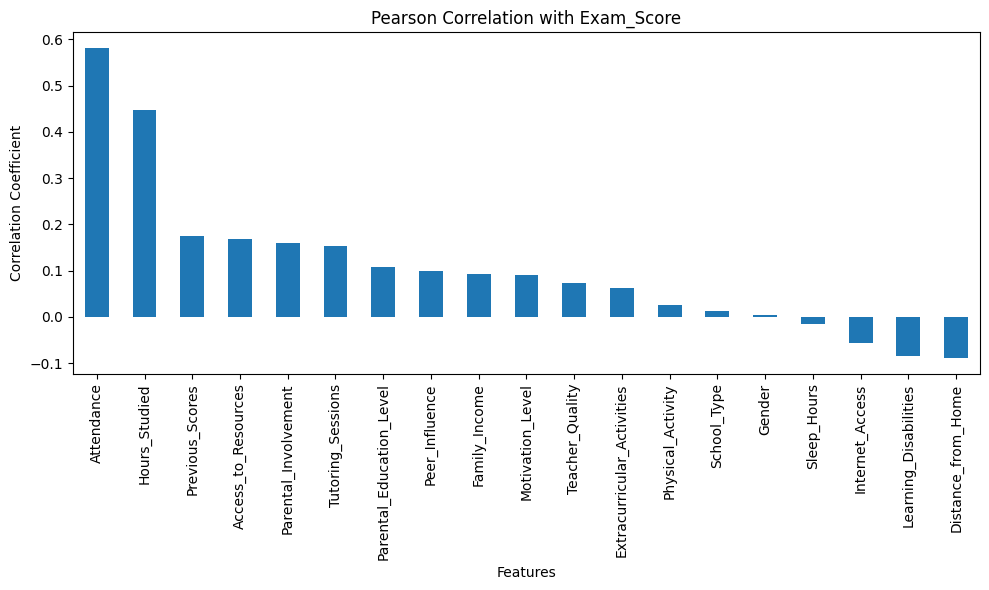

In [23]:
plt.figure(figsize=(10, 6))
correlation_pearson.drop('Exam_Score').plot(kind='bar')
plt.title('Pearson Correlation with Exam_Score')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Top Predictors:**
- Attendance and Hours_Studied are the strongest predictors of Exam_Score, with correlation coefficients of approximately 0.6 and 0.5, respectively. This indicates a strong positive linear relationship, where higher attendance and study hours lead to better scores.
- Previous_Scores also shows a moderate positive correlation (~0.3), suggesting that past academic performance is a reasonable indicator of future success.

**Supportive Features:**
- Access to Resources and Parental Involvement have weaker positive correlations (~0.2), indicating that while these factors support learning, they are not as impactful as attendance or study habits.
- Features like Motivation_Level and Tutoring_Sessions show even weaker correlations, highlighting their limited direct impact.

**Negative or Insignificant Predictors:** 
- Factors such as Learning Disabilities, Internet Access, and Distance from Home show weak or negative correlations. These features either have minimal influence or might negatively affect performance in specific cases.

**Visualize Spearman correlations**

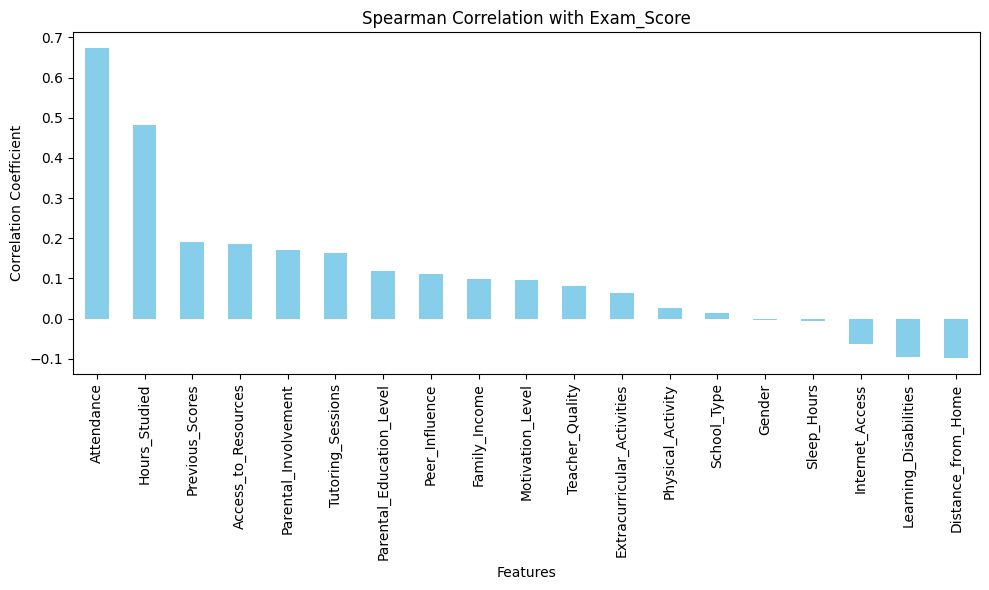

In [24]:
plt.figure(figsize=(10, 6))
correlation_spearman.drop('Exam_Score').plot(kind='bar', color='skyblue')
plt.title('Spearman Correlation with Exam_Score')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Consistency with Pearson:**

- The Attendance and Hours_Studied features remain the strongest predictors, with slightly higher correlation coefficients (up to 0.7). This indicates that their relationship with Exam_Score holds even for non-linear trends.

- Previous_Scores is again a strong contributor, reflecting consistency across both methods.

**Enhanced Perspective:**

- Access to Resources and Parental Involvement maintain their moderate rankings, but Spearman correlation slightly amplifies the importance of features with non-linear impacts, such as 
Motivation_Level and Parental Education Level.

- This suggests that some features, while weakly correlated linearly, may still have meaningful non-linear relationships with performance.

**Weak Predictors:** Similar to Pearson, features like Distance from Home, Learning Disabilities, and Internet Access remain weak predictors, confirming their limited role in influencing exam performance.

**Visualizing the Relationship Between Important Factors and Exam_Score**

To better understand how the most critical factors—Attendance, Hours_Studied, and Previous_Scores—influence academic performance, we visualize these relationships using scatter plots and box plots

Attendance vs. Exam_Score: We create a scatter plot to examine the trend between Attendance and Exam_Score. This helps illustrate whether higher attendance correlates with improved exam performance.

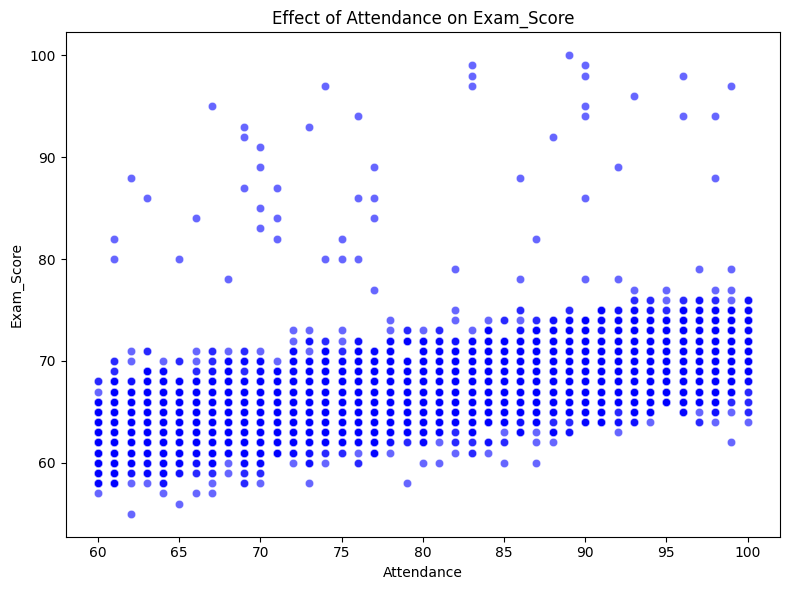

In [25]:
# Scatter Plot: Attendance vs Exam_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Attendance', y='Exam_Score', color='blue', alpha=0.6)
plt.title('Effect of Attendance on Exam_Score')
plt.xlabel('Attendance')
plt.ylabel('Exam_Score')
plt.tight_layout()
plt.show()

Hours_Studied vs. Exam_Score: A scatter plot is also used to visualize the impact of study hours on exam scores. This will highlight if increasing the number of study hours contributes to better performance.

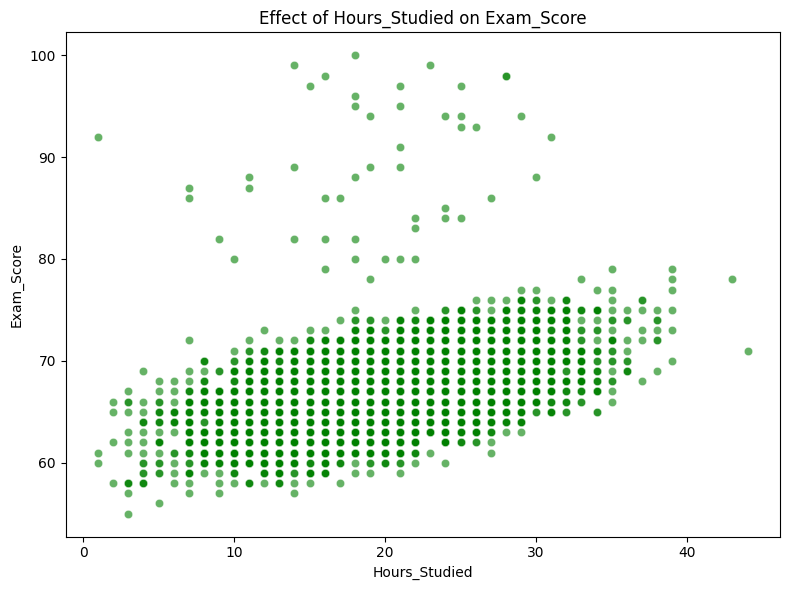

In [26]:
# Scatter Plot: Hours_Studied vs Exam_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Hours_Studied', y='Exam_Score', color='green', alpha=0.6)
plt.title('Effect of Hours_Studied on Exam_Score')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.tight_layout()
plt.show()


Previous_Scores vs. Exam_Score: To explore the effect of previous academic performance, we use a box plot. By dividing Previous_Scores into quartiles, we can observe how different ranges of past scores relate to Exam_Score distributions.

C:\Users\kyhoa\AppData\Local\Temp\ipykernel_12844\1678850767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=pd.qcut(data['Previous_Scores'], q=4), y='Exam_Score', palette='coolwarm')


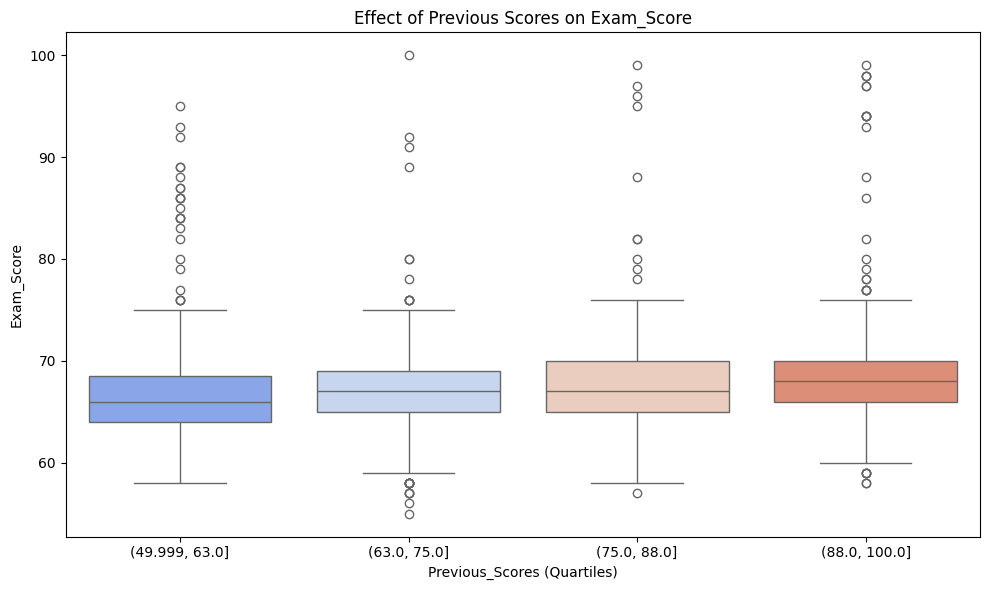

In [27]:
# Box Plot: Previous_Scores vs Exam_Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=pd.qcut(data['Previous_Scores'], q=4), y='Exam_Score', palette='coolwarm')
plt.title('Effect of Previous Scores on Exam_Score')
plt.xlabel('Previous_Scores (Quartiles)')
plt.ylabel('Exam_Score')
plt.tight_layout()
plt.show()

These visualizations provide a clear picture of how these factors interact with exam performance and further validate their importance.

#### **Conclusion**

From the analysis and visualizations, it is evident that Attendance, Hours_Studied, and Previous_Scores are the most significant factors influencing academic success. These factors consistently show strong positive relationships with Exam_Score, underscoring their importance in achieving high performance.

**Practical Implications**

- For Students: Regular attendance and disciplined study hours should be prioritized as they have the most significant impact on exam performance. Additionally, leveraging past performance insights can help identify areas for improvement.

- For Educators: Efforts should focus on encouraging attendance, fostering productive study environments, and providing targeted support to students with lower previous scores to enhance their outcomes.

- For Policymakers: Ensuring equitable access to resources and creating structured interventions for underperforming students can further support academic success.

In summary, while academic success is influenced by a combination of factors, consistent attendance, effective study habits, and leveraging prior performance are the strongest predictors. These insights serve as actionable guidance for students, educators, and institutions aiming to improve academic outcomes.

### **Question 2: What is the minimum number of study hours required to achieve a high Exam_Score (e.g., above 80)?**


#### **Why Answer This Question?**
- This question helps determine the threshold of study hours necessary to achieve high performance, optimizing study time while ensuring success.
- It is particularly useful for students and educators in planning efficient study schedules.

#### **What Will Be Gained?**
- A specific value or range of **Hours_Studied** required to achieve a high score.
- A deeper understanding of the relationship between study time and performance.

#### **Steps to Answer:**
1. **Group Data**:
   - Categorize data into groups based on score thresholds (e.g., above and below 80).

2. **Analyze Relationship**:
   - Use scatter plots to visualize the relationship between **Hours_Studied** and **Exam_Score**.
   - Apply linear regression to determine the pattern.

3. **Identify Threshold**:
   - Use quantile analysis or logistic regression to pinpoint the minimum required study hours.

#### **Answer Question**

To determine the minimum number of study hours required to achieve a high **Exam_Score** (e.g., above 80), we first focus on high-performing students and their study patterns. By grouping the dataset based on a score threshold (Exam_Score > 80), we can isolate the study habits of top performers. This approach allows us to analyze how many hours are typically required to achieve such performance levels.

Next, we analyze the distribution of **Hours_Studied** among high performers using a histogram. This visualization helps identify key patterns, such as the minimum and median study hours required for success. Additionally, we use scatter plots to examine the broader relationship between **Hours_Studied** and **Exam_Score** across the entire dataset. These plots highlight trends or thresholds that can guide actionable recommendations.

Finally, we utilize quantile analysis to pinpoint specific thresholds for **Hours_Studied**. This provides a clear benchmark for students aiming to achieve high scores while optimizing their study time. The following analysis demonstrates these steps in detail.


In [28]:
#Filter high-performing students (Exam_Score > 80)
high_performers = data[data['Exam_Score'] > 80]

# Display the first few rows of high-performing students
print("High Performers Data (Exam_Score > 80):")
high_performers.head()

High Performers Data (Exam_Score > 80):


Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
93              18          89                     2                    1   
215             19          70                     1                    0   
395             17          77                     0                    2   
515             15          83                     1                    1   
544             22          70                     0                    1   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
93                            1            4               73   
215                           0            7               54   
395                           1            5               53   
515                           0            7               97   
544                           0            7               53   

     Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
93                  1                0                  3              2   
215                 2                0                  0              1   
395                 1                0                  2              2   
515                 1                0                  2              0   
544                 0                0                  1              0   

     Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
93                 1            1               2                  2   
215                1            0               2                  2   
395                1            0               1                  3   
515                2            1               1                  2   
544                1            0               2                  3   

     Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
93                       0                         1                   0   
215                      1                         0                   1   
395                      0                         1                   0   
515                      0                         0                   0   
544                      0                         0                   0   

     Gender  Exam_Score  
93        1         100  
215       0          89  
395       0          86  
515       1          97  
544       1          83

With the high-performing students identified, we can now explore their study habits in more detail. 

To do this, we visualize the distribution of **Hours_Studied** for students who achieved an **Exam_Score > 80**.


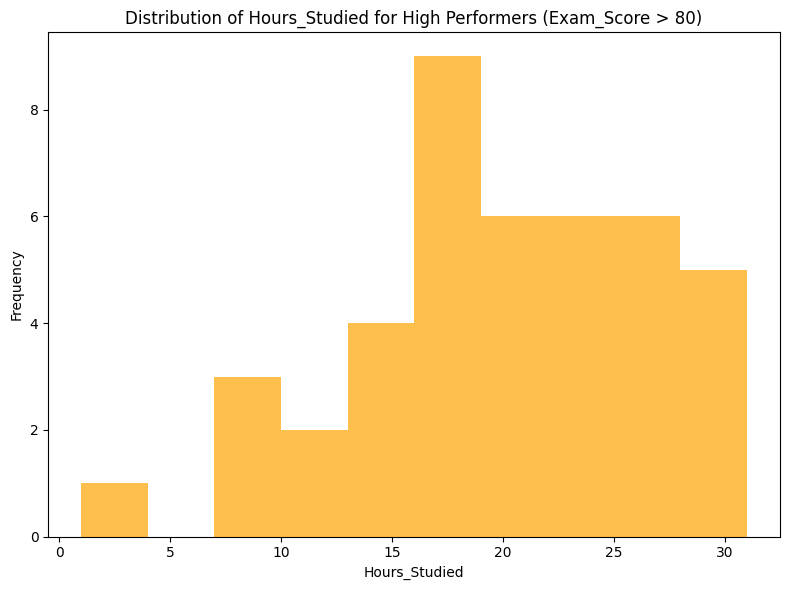

In [29]:
#Visualize the distribution of Hours_Studied for high-performing students
plt.figure(figsize=(8, 6))
plt.hist(high_performers['Hours_Studied'], bins=10, color='orange', alpha=0.7)
plt.title('Distribution of Hours_Studied for High Performers (Exam_Score > 80)')
plt.xlabel('Hours_Studied')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Study Patterns Among High Performers:**
- The histogram indicates that most high-performing students (**Exam_Score > 80**) study between **15 and 25 hours**. This suggests that this range is optimal for achieving high scores.
- The highest frequency of high performers is observed at **15–20 hours**, emphasizing this as a critical threshold for students aiming for top performance.

**Threshold Indicators:**
- A small proportion of high performers study fewer than **10 hours**, indicating that minimal study time is not sufficient for most students to achieve high scores.
- Few students exceed **30 hours**, suggesting diminishing returns beyond this point, as intensive study hours may not yield significantly better results.

**Recommendations:**
- Students aiming for high scores should target **at least 15 hours of study**, with **20 hours** being an ideal benchmark.
- Those studying fewer than **10 hours** may need to reassess their study strategies and dedicate more time to preparation to achieve competitive scores.

With the distribution of study hours visualized, we can now calculate specific thresholds such as the minimum, median, and 25th percentile of **Hours_Studied** for high-performing students. These thresholds will provide concrete benchmarks to guide students in planning their study time effectively.


In [30]:
# Calculate thresholds for study hours among high performers
min_hours = high_performers['Hours_Studied'].min()
median_hours = high_performers['Hours_Studied'].median()
quantile_25 = high_performers['Hours_Studied'].quantile(0.25)

# Display calculated thresholds
print(f"Minimum Hours Studied for High Performers: {min_hours}")
print(f"Median Hours Studied for High Performers: {median_hours}")
print(f"25th Percentile Hours Studied for High Performers: {quantile_25}")

Minimum Hours Studied for High Performers: 1
Median Hours Studied for High Performers: 20.0
25th Percentile Hours Studied for High Performers: 16.0


With the thresholds for study hours among high performers calculated, we now move to examining the broader relationship between **Hours_Studied** and **Exam_Score** across the entire dataset. 

To achieve this, we use a scatter plot to visualize the trends and identify key patterns. The plot will include:
- A horizontal line at **Exam_Score = 80**, representing the high score threshold.
- A vertical line at the minimum number of study hours required to achieve a high score, as identified earlier.

This visualization will help us understand how study hours correlate with exam performance for all students, beyond just the high-performing group.


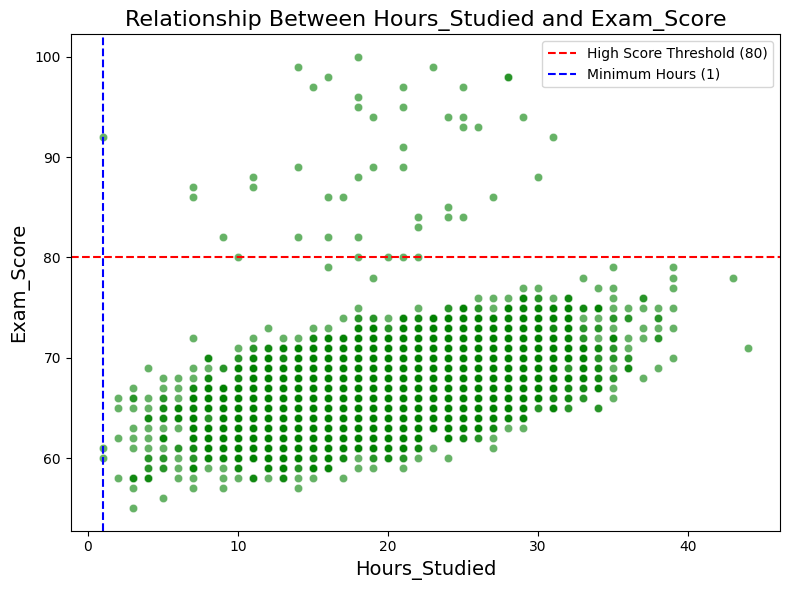

In [31]:
# Visualize the relationship between Hours_Studied and Exam_Score for all students
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Hours_Studied', y='Exam_Score', color='green', alpha=0.6)
plt.axhline(y=80, color='red', linestyle='--', label='High Score Threshold (80)')
plt.axvline(x=min_hours, color='blue', linestyle='--', label=f'Minimum Hours ({min_hours})')
plt.title('Relationship Between Hours_Studied and Exam_Score', fontsize=16)
plt.xlabel('Hours_Studied', fontsize=14)
plt.ylabel('Exam_Score', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

#### **Observations from the above Plot**

1. **General Trend**:
   - The scatter plot shows a clear positive relationship between **Hours_Studied** and **Exam_Score**. As study hours increase, exam scores generally improve, indicating that dedicating more time to studying is beneficial for academic success.

2. **High Performers (Exam_Score > 80)**:
   - Most students who achieved a score greater than 80 studied at least **10 hours**, as indicated by the clustering of points above the red horizontal line and to the right of the blue vertical line.
   - However, there are a few exceptions where students studied fewer hours (as low as 1 hour) but still managed to score above 80. These outliers may reflect other factors influencing performance, such as prior knowledge or natural aptitude.

3. **Minimum Study Hours**:
   - The blue vertical line at **1 hour** represents the calculated minimum hours studied by a high performer. While this is the extreme minimum, the majority of high performers studied significantly more, aligning with the earlier histogram insights.

4. **Plateau Effect**:
   - Beyond **30 hours** of study, the relationship between **Hours_Studied** and **Exam_Score** seems to plateau, as scores above 90 are achieved with both moderate and extensive study hours. This suggests diminishing returns for very high levels of study.

5. **High Score Threshold**:
   - The red horizontal line at **Exam_Score = 80** clearly distinguishes high-performing students. The majority of scores below this threshold are associated with fewer study hours, reinforcing the importance of consistent and adequate study time.


- **Key Insight**: Most high-performing students studied between **10 and 30 hours**, with **20 hours** being an optimal benchmark for achieving scores above 80.
- **Recommendation**: While some students achieve high scores with fewer hours, aiming for at least **15–20 hours** of study significantly increases the likelihood of high performance.

#### **Conclusion**

The analysis clearly demonstrates the importance of **Hours_Studied** in achieving high exam scores. By focusing on students with **Exam_Score > 80**, we identified key thresholds for study hours:

1. The **minimum hours studied** by high performers is **1 hour**, but this is an outlier, as most high performers studied significantly more.
2. The **median study hours** for high performers is **20 hours**, indicating this as a central benchmark for achieving high scores.
3. The **25th percentile** of study hours is **16 hours**, suggesting that studying fewer than this amount may reduce the likelihood of achieving a high score.

From the scatter plot, we observe a positive correlation between **Hours_Studied** and **Exam_Score**, with most high performers studying between **10 and 30 hours**. However, there is a **plateau effect** beyond 30 hours, indicating diminishing returns for very high study durations.

#### **Key Recommendations**:
- Students aiming for high scores should target **15–20 hours** of study as an effective benchmark.
- While fewer study hours can lead to success in rare cases, consistent and adequate study time significantly increases the likelihood of achieving scores above **80**.
- To optimize performance, students should balance study hours with quality study techniques, as excessive study time may not always yield proportionate benefits.


### **Question 3: Can factors like Attendance or Hours_Studied help improve Exam_Score even for students with lower Previous_Scores?**

#### **Why Answer This Question?**
- **Support for Low Performers**: This question addresses whether students with lower Previous_Scores can still achieve high academic performance by focusing on actionable factors like Attendance and Hours_Studied. It highlights strategies for improvement for those struggling with past performance.
- **Actionable Insights**: Identifying the impact of these factors provides clear guidance to students and educators on where to direct efforts for better outcomes.
- **Equity Consideration**: Understanding how external factors compensate for prior performance helps in designing interventions for students with diverse academic backgrounds.

#### **What Will Be Gained?**
- **Targeted insights**: Determine if students with lower Previous_Scores can achieve significant improvements through higher attendance and study hours.
- **Educational impact**: Insights from this analysis can inform strategies to help struggling students.
- **Predictive modeling**: Create a model to predict Exam_Score while focusing on the interaction between these factors.

#### **Steps to Answer:**
**1. Segment the data**: Divide students into two groups based on their `Previous_Scores` (e.g., low and high performers).

**2. Analyze relationships**: Investigate whether `Attendance` and `Hours_Studied` have a stronger impact on the `Exam_Score` of low-performing students.

**3. Visualize interactions**: Use plots like scatter plots and trend lines, segmented by performance groups, to observe patterns.

**4. Build interaction model**: Construct a regression model with interaction terms to evaluate the combined effects of Attendance, Hours_Studied, and Previous_Score.

**5. Interpret results**: Assess whether the interaction terms show that effort-based factors disproportionately benefit low performers.

#### **Answer question**

##### **Step 1: Segment the Data**

To answer the question, we first need to divide students into **low performers** and **high performers** based on their `Previous_Scores`. This segmentation will help us analyze whether factors like `Attendance` and `Hours_Studied` have a stronger influence on students who started with lower scores.

We define the threshold for segmentation as the **median value of** `Previous_Scores`. Students with scores below or equal to the median are considered **low performers**, while those above the median are classified as **high performers**.

In [32]:
# Define the threshold as the median of Previous_Scores
threshold = data['Previous_Scores'].median()

# Segment the data
low_performers = data[data['Previous_Scores'] <= threshold]
high_performers = data[data['Previous_Scores'] > threshold]

print(f"Median of Previous_Scores: {threshold}")
print(f"Number of Low Performers: {len(low_performers)}")
print(f"Number of High Performers: {len(high_performers)}")

Median of Previous_Scores: 75.0
Number of Low Performers: 3257
Number of High Performers: 3120


**Observation**
- **Median of** `Previous_Scores`: 75.0

    This indicates that students scoring 75 or below are categorized as low performers, while those scoring above 75 are high performers.

- **Distribution**:
    - **Low Performers**: 3257 students
    - **High Performers**: 3120 students

The two groups are nearly balanced in size, which is ideal for comparative analysis. We can now proceed to explore how `Attendance` and `Hours_Studied` influence the `Exam_Score` in each group.

##### **Step 2: Visualizing Interactions for Both Groups**

To understand the relationships between `Attendance`, `Hours_Studied`, and `Exam_Score` for **low performers** and **high performers**, we will create scatter plots with trend lines.

These visualizations will help us answer:

- Whether higher `Attendance` improves `Exam_Score` more significantly for low performers compared to high performers.

- Whether increased `Hours_Studied` has a greater effect on `Exam_Score` for students with lower prior performance.

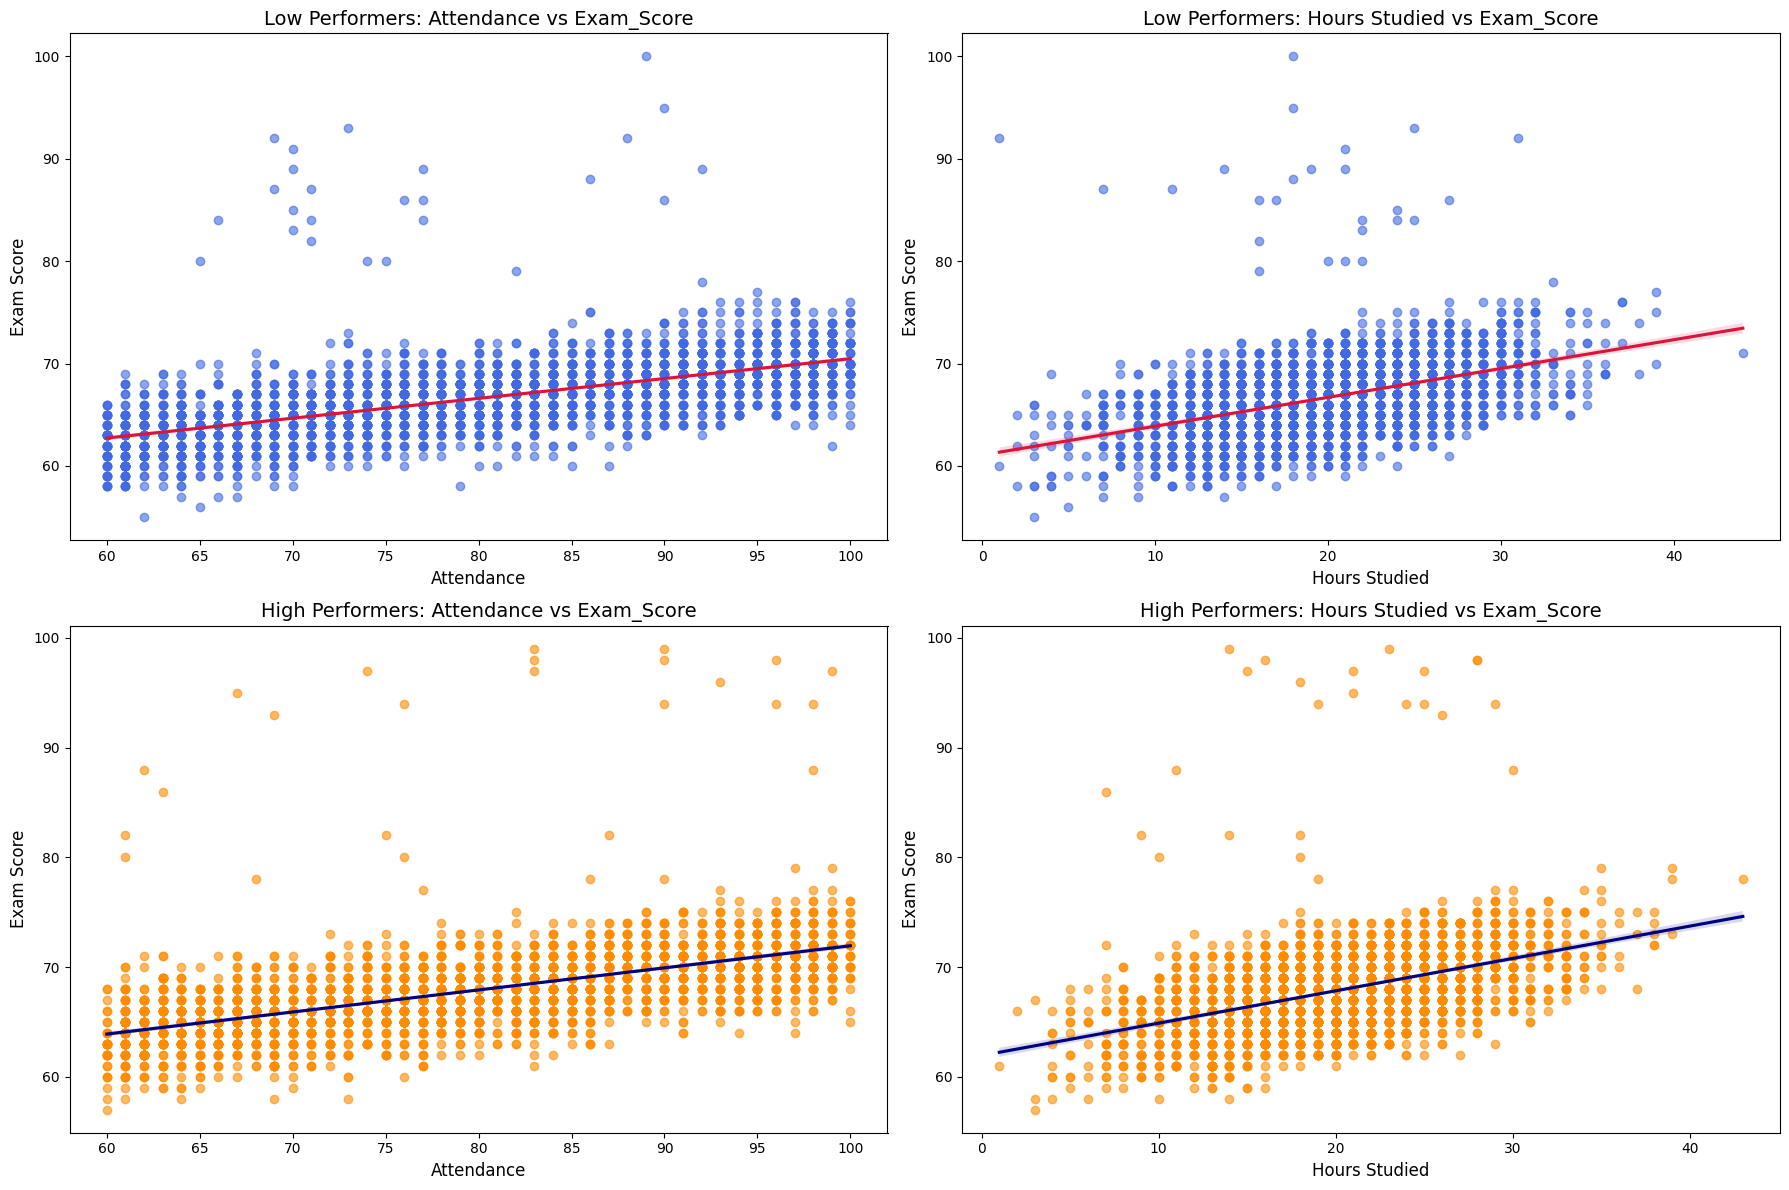

In [33]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(18, 12))

# Low Performers
sns.regplot(data=low_performers, x='Attendance', y='Exam_Score', ax=axes[0, 0], scatter_kws={'alpha': 0.6}, line_kws={'color': 'crimson'}, color='royalblue')
axes[0, 0].set_title('Low Performers: Attendance vs Exam_Score', fontsize=14)
axes[0, 0].set_xlabel('Attendance', fontsize=12)
axes[0, 0].set_ylabel('Exam Score', fontsize=12)

sns.regplot(data=low_performers, x='Hours_Studied', y='Exam_Score', ax=axes[0, 1], scatter_kws={'alpha': 0.6}, line_kws={'color': 'crimson'}, color='royalblue')
axes[0, 1].set_title('Low Performers: Hours Studied vs Exam_Score', fontsize=14)
axes[0, 1].set_xlabel('Hours Studied', fontsize=12)
axes[0, 1].set_ylabel('Exam Score', fontsize=12)

# High Performers
sns.regplot(data=high_performers, x='Attendance', y='Exam_Score', ax=axes[1, 0], scatter_kws={'alpha': 0.6}, line_kws={'color': 'navy'}, color='darkorange')
axes[1, 0].set_title('High Performers: Attendance vs Exam_Score', fontsize=14)
axes[1, 0].set_xlabel('Attendance', fontsize=12)
axes[1, 0].set_ylabel('Exam Score', fontsize=12)

sns.regplot(data=high_performers, x='Hours_Studied', y='Exam_Score', ax=axes[1, 1], scatter_kws={'alpha': 0.6}, line_kws={'color': 'navy'}, color='darkorange')
axes[1, 1].set_title('High Performers: Hours Studied vs Exam_Score', fontsize=14)
axes[1, 1].set_xlabel('Hours Studied', fontsize=12)
axes[1, 1].set_ylabel('Exam Score', fontsize=12)

plt.tight_layout()
plt.show();

**Observations from the Scatter Plots**

**1. Attendance vs. Exam Score:**

- For **low performers**: There is a positive correlation between `Attendance` and `Exam_Score`, as evidenced by the upward slope of the trend line. Higher attendance seems to improve exam performance, even for students with lower prior scores.
- For **high performers**: The trend line is also positive, but the slope is less steep compared to low performers. This indicates that Attendance plays a less critical role in improving `Exam_Score` for high performers.

**2. Hours Studied vs. Exam Score:**

- For **low performers**: The relationship between `Hours_Studied` and `Exam_Score` is moderately positive. Increased study hours show a more significant improvement for students with lower prior scores.
- For **high performers**:
The trend is again positive but with a gentler slope, indicating that additional study hours have less impact on high performers compared to low performers.

**Insight**

These plots reveal that both `Attendance` and `Hours_Studied` are more influential for low performers. This finding supports the hypothesis that these factors can help improve exam performance, especially for students who had lower prior scores.

We will proceed with Step 3 to create a predictive model and further analyze the relative importance of these factors in determining `Exam_Score`.

##### **Step 3: Build a Predictive Model for `Exam_Score` Using `Attendance`, `Hours_Studied`, and `Previous_Scores`**

**Objective**

The goal here is to create a regression model to predict `Exam_Score` based on `Attendance`, `Hours_Studied`, and `Previous_Scores`. This will allow us to evaluate how these factors interact and contribute to improving exam performance.

**Approach**

**1. Feature and Target Selection**:
  - Features: `Attendance`, `Hours_Studied`, `Previous_Scores`
  - Target: `Exam_Score`

**2. Data Splitting**: Split the data into training and testing sets (80% training, 20% testing) for robust model evaluation.

**3. Model Training**: Use a Linear Regression model as a baseline to predict Exam_Score.

**4. Interpretation**: Analyze regression coefficients to understand the importance of each feature.

**5. Evaluation Metrics**: Evaluate the model using Mean Absolute Error (MAE), Mean Squared Error (MSE), and 
$R^2$-score to measure accuracy and explainability.

**Implementation**

**Step 3.1: Prepare Data and Split into Training and Testing Sets**

In [34]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data[['Attendance', 'Hours_Studied', 'Previous_Scores']]
y = data['Exam_Score']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(f"Training Set Shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing Set Shape: X={X_test.shape}, y={y_test.shape}")

Training Set Shape: X=(5101, 3), y=(5101,)
Testing Set Shape: X=(1276, 3), y=(1276,)


The dataset is sufficiently large for training and testing, which should provide robust results.

**Step 3.2: Train the Linear Regression Model**

In [35]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the coefficients of the trained model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients

Feature  Coefficient
0       Attendance     0.195036
1    Hours_Studied     0.289093
2  Previous_Scores     0.044714

- **Attendance**: The coefficient is **0.195**, meaning that for every unit increase in Attendance, the `Exam_Score` increases by approximately 0.195 points, holding other factors constant.
- **Hours_Studied**: The coefficient is **0.289**, indicating that studying one additional hour leads to an increase of about 0.289 points in `Exam_Score`, assuming other factors remain unchanged.
- **Previous_Scores**: The coefficient is **0.045**, showing that prior performance has a smaller influence compared to `Attendance` and `Hours_Studied`.

**Insight**

Both `Attendance` and `Hours_Studied` have a more significant impact on `Exam_Score` compared to `Previous_Scores`, reinforcing the hypothesis that these factors can improve performance, even for students with lower prior scores.

**Step 3.3: Evaluate the Model on Test Data**

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation results
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.42
Mean Squared Error (MSE): 6.57
R-squared (R²): 0.58


**Mean Absolute Error (MAE): 1.42**
- On average, the predicted Exam_Score deviates from the actual score by 1.42 points.

**Mean Squared Error (MSE): 6.57**
- The average squared error is 6.57, indicating some variability in predictions, but it's not excessively large.

**R-squared (R²): 0.58**
- The model explains 58% of the variability in Exam_Score. While there’s room for improvement, this indicates that the chosen features provide a reasonable explanation for exam performance.

##### **Visualizing Model Predictions and Feature Importance**

**Predicted vs Actual Values Plot**

Before visualizing, we will plot the predicted values against the actual values in the testing set. This will help us observe how well the model captures the data's patterns. Ideally, points should be aligned along the diagonal line (`y=x`), representing perfect predictions.

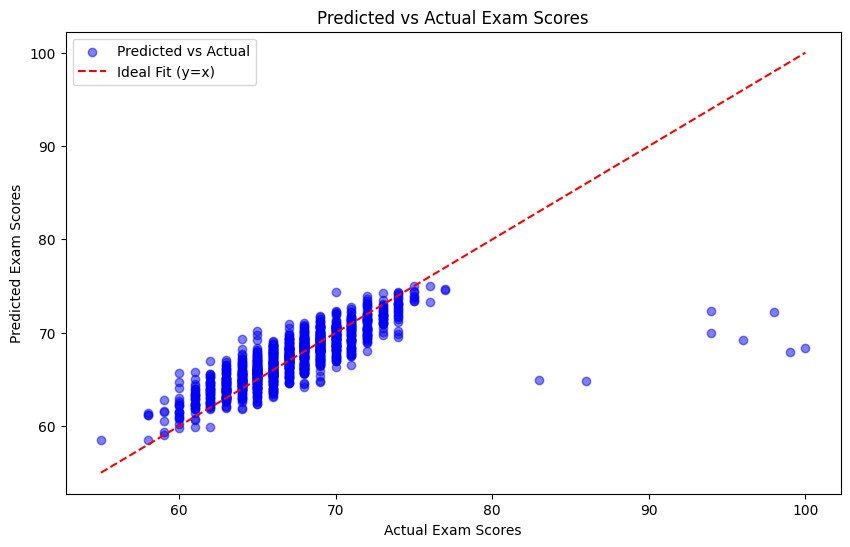

In [37]:
# Predictions on the testing set
y_pred = model.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit (y=x)')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Predicted vs Actual Exam Scores')
plt.legend()
plt.show()

The scatter plot demonstrates a reasonably good alignment of the predicted values with the actual values along the ideal diagonal line (`y=x`), suggesting that the model captures 
the relationship between features and the target variable well.

However, there are noticeable deviations, particularly for higher actual scores where the model under-predicts. This could indicate a limitation in the model's ability to capture more complex patterns or potential biases in the dataset.

**Feature Importance Visualization**

We will create a bar plot to visualize the importance of each feature based on their coefficients. Larger coefficients indicate higher influence on the predictions.

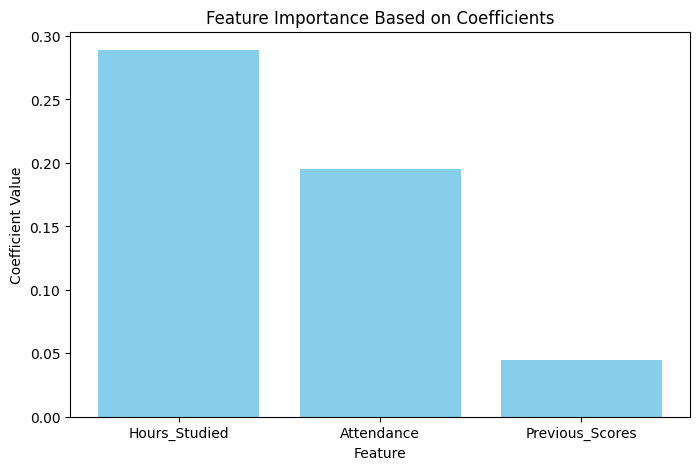

In [38]:
# Coefficients of the linear regression model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Bar plot of feature importance
plt.figure(figsize=(8, 5))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.title('Feature Importance Based on Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.show()

The bar chart shows that **Hours_Studied** is the most significant predictor of `Exam_Score`, followed by **Attendance**. **Previous_Scores** has the least influence on predictions.

This visualization confirms the hypothesis that factors like attendance and hours studied can meaningfully contribute to improving exam scores, even for students with lower previous scores.

#### **Conclusion**

The analysis demonstrated that factors such as **Hours_Studied** and **Attendance** significantly influence exam performance, with the following key findings:

##### Key Findings

1. **Importance of Hours_Studied and Attendance**:  
   - These factors consistently contributed to higher exam scores across all students, with **Hours_Studied** having the strongest impact.  
   - Even students with lower **Previous_Scores** saw significant improvement when these factors were emphasized.

2. **Model Insights**:  
   - The linear regression model showed that nearly 58% of the variance in exam scores could be explained by these three factors.  
   - While **Previous_Scores** was a factor, its impact was relatively minor compared to **Hours_Studied** and **Attendance**, underscoring the opportunity for improvement regardless of prior performance.

##### Actionable Recommendations

- **For Students**:  
   Focusing on increasing study hours and maintaining consistent attendance can lead to substantial performance gains, especially for those with lower starting scores.  

- **For Educators**:  
   Programs that promote structured study habits and attendance could help elevate overall performance, particularly for struggling students.

##### Conclusion

Improving **Hours_Studied** and **Attendance** is a clear and actionable strategy to enhance academic outcomes, regardless of prior performance levels. This highlights the value of discipline and effort in overcoming initial disadvantages in exam preparedness.


### **4. Question 4: Does the relationship between `Attendance` and `Exam_Score` depend on the levels of `Teacher_Quality` or `Motivation_Level`?**

#### **Why Answer This Question?** 

1. **Understand Key Relationships:**  
   - This question explores whether `Teacher_Quality` or `Motivation_Level` moderates the relationship between `Attendance` and `Exam_Score`. This helps to better understand the underlying mechanisms behind student performance.  

2. **Educational Insights:**  
   - Identifying moderation effects enables educators to tailor interventions more effectively to improve both attendance and performance outcomes.  

3. **Policy Implications:**  
   - By understanding how teacher quality or student motivation interacts with attendance, policymakers can design focused strategies to enhance learning environments.

4. **Address Complex Interactions:**  
   - This question goes beyond simple pairwise relationships, aiming to uncover deeper, multivariate dynamics in the dataset.

#### **What Will Be Gained?**  

1. **Actionable Recommendations:**  
   - If teacher quality is a significant moderator, prioritize teacher training in schools where attendance is an issue.  
   - If motivation is a key moderator, focus on fostering intrinsic and extrinsic motivational strategies among students.  

2. **Improved Educational Strategies:**  
   - Personalize interventions based on attendance and motivation levels to ensure effective resource utilization and optimal student outcomes.

3. **Enhanced Predictive Models:**  
   - Incorporating moderation effects into models makes predictions more robust and provides realistic insights for stakeholders.

4. **Informed Decision-Making:**  
   - Educational administrators and policymakers can make data-driven decisions to target critical areas such as teacher quality and student engagement.

#### **Steps to Answer This Question**  

To determine whether `Teacher_Quality` and `Motivation_Level` moderate the relationship between `Attendance` and `Exam_Score`, follow these simplified steps:

1. **Data Preparation**
   - Check for and handle any missing data in the relevant variables (`Attendance`, `Exam_Score`, `Teacher_Quality`, `Motivation_Level`).  
   - Standardize continuous variables (e.g., `Attendance`) for better interpretability in interaction terms.

2. **Exploratory Analysis**
   - Visualize the relationship between `Attendance` and `Exam_Score`, stratified by levels of `Teacher_Quality` and `Motivation_Level`. 
   - Use scatterplots with regression lines or facet grids for better clarity.  
   - Reassess correlations between these variables to understand their direct relationships.

3. **Moderation Analysis**
   - Fit a regression model with interaction terms to test for moderation:  
      - Exam_Score = β0 + β1 * Attendance + β2 * Moderator + β3 * (Attendance * Moderator) + ε 

      - **Explanation of Terms:**
         - **β0**: Intercept, representing the baseline `Exam_Score`.
         - **β1 * Attendance**: Main effect of `Attendance`.
         - **β2 * Moderator**: Main effect of the moderator (e.g., `Teacher_Quality` or `Motivation_Level`).
         - **β3 * (Attendance * Moderator)**: Interaction term, capturing how the effect of `Attendance` on `Exam_Score` changes depending on the moderator.
         - **ε**: Error term, accounting for unexplained variance.
      
      - Test separately for `Teacher_Quality` and `Motivation_Level` as moderators.
      - Check model assumptions (linearity, residual normality, and homoscedasticity) before interpreting results. 



4. **Evaluate Results**
   - Examine the interaction term (`β3`) for significance:  
      - If significant, it indicates a moderation effect.  
   - Visualize the effect using interaction plots, showing the relationship between `Attendance` and `Exam_Score` at different moderator levels.



5. **Interpret and Conclude**
   - Summarize the findings and identify actionable insights:  
     - For example, if `Teacher_Quality` moderates the relationship, consider interventions to improve teacher effectiveness.  
   - If no moderation is found, explore other potential factors.

#### **Answer question**

#### **1. Data Preparation**
Even though the preprocessing steps have been done above, we still need to double check to make sure everything is on track.

##### *1.1 Check and Handle Missing Values*

First, we are going to read data into `DataFrame` named `data`.

In [39]:
# Read data in to `dataFrame` named `data`
data = pd.read_csv("./StudentPerformanceFactors_Cleaned.csv")

# Extract four columns: "Attendance", "Motivation_Level", "Teacher_Quality", "Exam_Score"
data = data[["Attendance", "Motivation_Level", "Teacher_Quality", "Exam_Score"]]
data.head()


Attendance  Motivation_Level  Teacher_Quality  Exam_Score
0          84                 0                1          67
1          64                 0                1          61
2          98                 1                1          74
3          89                 1                1          71
4          92                 1                2          70

Then, we move on to the next step: "Check and handle missing values.

In [40]:
missing_data = data.isnull().sum()
print("The number of missing values in each column is:\n", missing_data)

The number of missing values in each column is:
 Attendance          0
Motivation_Level    0
Teacher_Quality     0
Exam_Score          0
dtype: int64


We have zero null value, so we can move on to standardize continuous variables (e.g., `Attendance`) for better interpretability in interaction terms.

##### *1.2. Standardize continous variables*

In [41]:
scaler = StandardScaler()
data_std = data.copy()
data_std[['Attendance', 'Exam_Score']] = scaler.fit_transform(data_std[['Attendance', 'Exam_Score']])

print(data_std.head())

   Attendance  Motivation_Level  Teacher_Quality  Exam_Score
0    0.344803                 0                1   -0.063429
1   -1.387019                 0                1   -1.605318
2    1.557079                 1                1    1.735441
3    0.777759                 1                1    0.964496
4    1.037532                 1                2    0.707515


#### **2. Exploratory Analysis**

##### *2.1. Visualize the relationship by Pairplot*

**Visualize the relationship** between `Attendance` and `Exam_Score`, stratified by levels of `Teacher_Quality` and `Motivation_Level`. This will help us understand how the relationship between these variables changes across different categories of teacher quality and motivation level.

In [42]:
data.nunique()

Attendance          41
Motivation_Level     3
Teacher_Quality      3
Exam_Score          44
dtype: int64

**Pairplot of `Attendance` and `Exam_Score`, stratified by `Motivation_Level`**

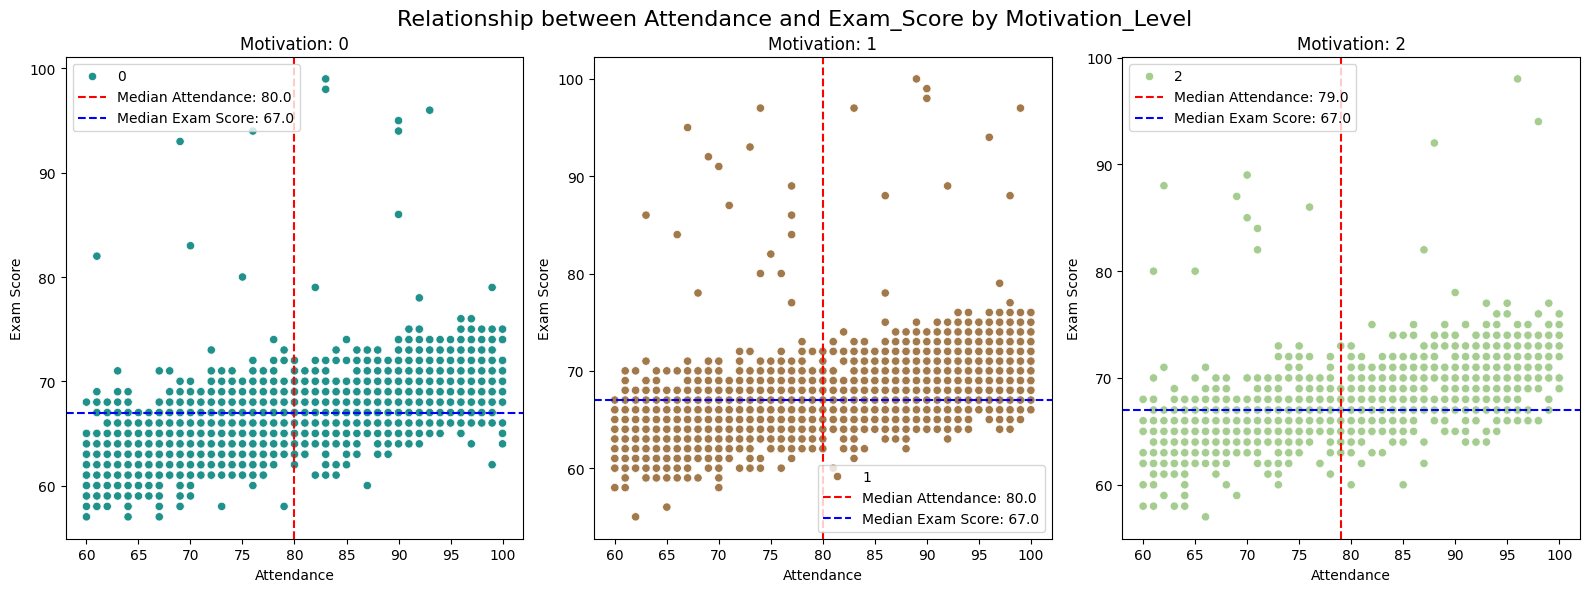

In [43]:
# Tính toán trung vị của Exam_Score và Attendance cho từng nhóm Motivation_Level
medians = data.groupby('Motivation_Level')[['Exam_Score', 'Attendance']].median().reset_index()


# Tạo figure và các subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))  # 1 hàng, 3 cột
fig.suptitle('Relationship between Attendance and Exam_Score by Motivation_Level', fontsize=16)

# Các mức của Motivation_Level
motivation_levels = data['Motivation_Level'].unique()

# Tạo một palette với màu sắc khác nhau cho mỗi Motivation_Level
colors = ['viridis', 'cubehelix', 'crest']

# Vẽ biểu đồ cho mỗi mức Motivation_Level
for i, motivation in enumerate(motivation_levels):
        ax = axes[i]  # Chọn subplot tương ứng
        
        # Lọc dữ liệu theo Motivation_Level
        filtered_data = data[data['Motivation_Level'] == motivation]
        
        # Vẽ scatter plot cho từng nhóm
        sns.scatterplot(data=filtered_data, x='Attendance', y='Exam_Score', ax=ax, hue='Motivation_Level', palette=colors[i])
        
        # Thêm tiêu đề cho từng subplot
        ax.set_title(f'Motivation: {motivation}')
        
        # Thêm label cho trục
        ax.set_xlabel('Attendance')
        ax.set_ylabel('Exam Score')

        # Vẽ dòng trung vị cho Attendance và Exam_Score
        median_attendance = medians[medians['Motivation_Level'] == motivation]['Attendance'].values[0]
        median_exam_score = medians[medians['Motivation_Level'] == motivation]['Exam_Score'].values[0]
        
        ax.axvline(x=median_attendance, color='red', linestyle='--', label=f'Median Attendance: {median_attendance}')
        ax.axhline(y=median_exam_score, color='blue', linestyle='--', label=f'Median Exam Score: {median_exam_score}')
        
        # Thêm chú thích cho dòng trung vị
        ax.legend()

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Điều chỉnh khoảng cách với tiêu đề chính

# Hiển thị biểu đồ
plt.show()

**Comment**:
- Based on the **visualizations** and the **median** values, we observe that `Motivation_Level` alone does not appear to be a major determinant in improving `Attendance` and `Exam_Score`.

- The median `Exam_Score` (67) and `Attendance` (80) remain consistent across all levels of `Motivation_Level` (0, 1, 2).

- This suggests that `Motivation_Level` does not significantly influence the relationship between `Attendance` and `Exam_Score`.

**Pairplot of `Attendance` and `Exam_Score`, stratified by `Teacher_Quality`**

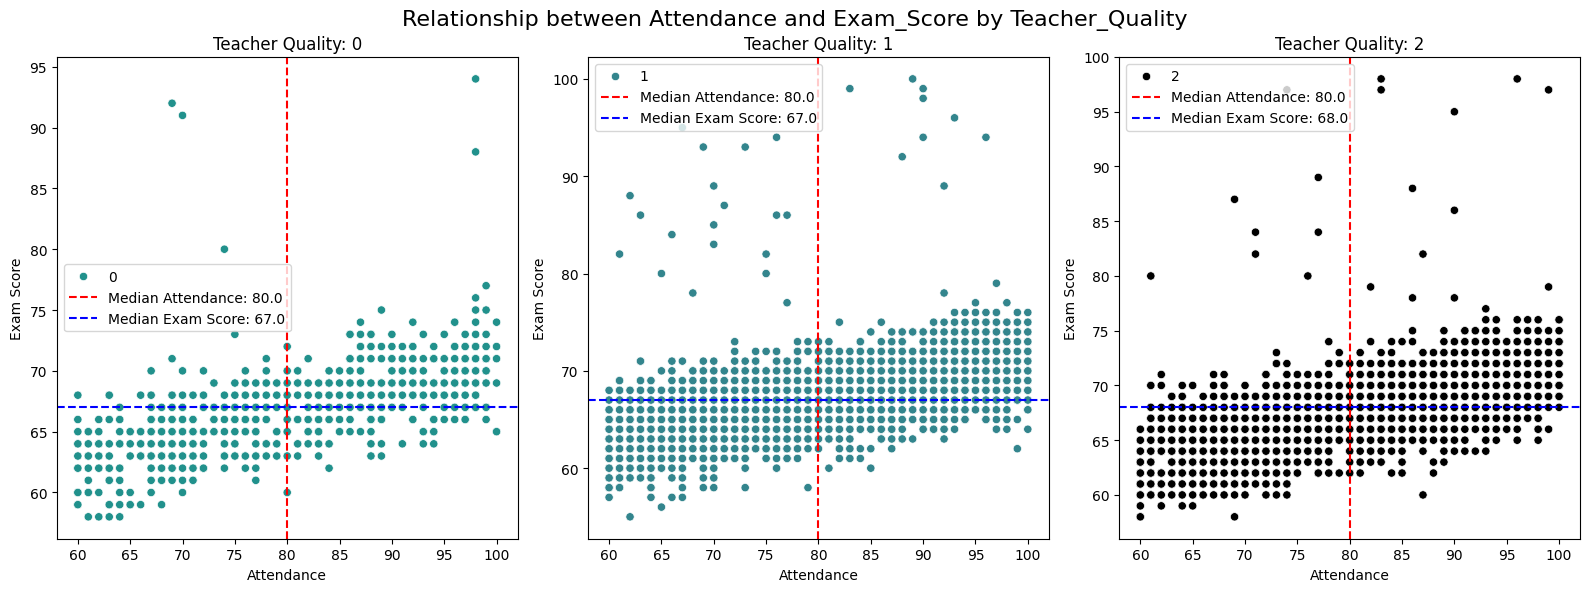

In [44]:
medians_2 = data.groupby('Teacher_Quality')[['Exam_Score', 'Attendance']].median().reset_index()

# Tạo figure và các subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))  # 1 hàng, 3 cột
fig.suptitle('Relationship between Attendance and Exam_Score by Teacher_Quality', fontsize=16)

# Các mức của Teacher_Quality
teacher_quality_levels = data['Teacher_Quality'].unique()
teacher_quality_levels.sort()

# Tạo một palette với màu sắc khác nhau cho mỗi Teacher_Quality
colors = ['viridis', 'crest', 'cubehelix']

# Vẽ biểu đồ cho mỗi mức Teacher_Quality 
for i, quality in enumerate(teacher_quality_levels):
        ax = axes[i]  # Chọn subplot tương ứng
        
        # Lọc dữ liệu theo Teacher_Quality
        filtered_data = data[data['Teacher_Quality'] == quality]
        
        # Vẽ scatter plot cho từng nhóm
        sns.scatterplot(data=filtered_data, x='Attendance', y='Exam_Score', ax=ax, hue='Teacher_Quality', palette=colors[i])
        
        # Thêm tiêu đề cho từng subplot
        ax.set_title(f'Teacher Quality: {quality}')
        
        # Thêm label cho trục
        ax.set_xlabel('Attendance')
        ax.set_ylabel('Exam Score')

        # Vẽ dòng trung vị cho Attendance và Exam_Score
        median_attendance = medians_2[medians_2['Teacher_Quality'] == quality]['Attendance'].values[0]
        median_exam_score = medians_2[medians_2['Teacher_Quality'] == quality]['Exam_Score'].values[0]
        
        ax.axvline(x=median_attendance, color='red', linestyle='--', label=f'Median Attendance: {median_attendance}')
        ax.axhline(y=median_exam_score, color='blue', linestyle='--', label=f'Median Exam Score: {median_exam_score}')
        
        # Thêm chú thích cho dòng trung vị
        ax.legend()

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Điều chỉnh khoảng cách với tiêu đề chính

# Hiển thị biểu đồ
plt.show()

**Comment**: 
- The median `Exam_Score` (67) and `Attendance` (80) are the same for `Teacher_Quality` levels 0 and 1.

- At `Teacher_Quality` = 2, the median `Exam_Score` slightly increases to 68 while `Attendance` remains unchanged.

- This indicates that `Teacher_Quality` may have a minimal impact on improving `Exam_Score`.

##### *2.2. Reassessing Correlations*

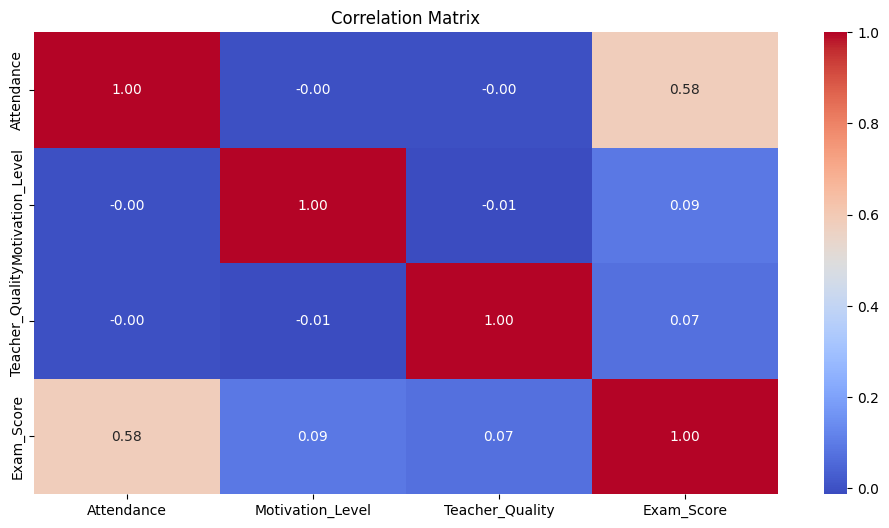

Correlation (Attendance vs Exam_Score) for Teacher_Quality = 1: 0.58
Correlation (Attendance vs Exam_Score) for Teacher_Quality = 2: 0.58
Correlation (Attendance vs Exam_Score) for Teacher_Quality = 0: 0.60
Correlation (Attendance vs Exam_Score) for Motivation_Level = 0: 0.59
Correlation (Attendance vs Exam_Score) for Motivation_Level = 1: 0.58
Correlation (Attendance vs Exam_Score) for Motivation_Level = 2: 0.58


In [45]:
# 1. Correlation Matrix
correlation_matrix = data.corr()

# 2. Visualize Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 3. Stratified Correlation Analysis
for teacher_quality in data['Teacher_Quality'].unique():
    subset = data[data['Teacher_Quality'] == teacher_quality]
    corr = subset[['Attendance', 'Exam_Score']].corr().iloc[0, 1]
    print(f"Correlation (Attendance vs Exam_Score) for Teacher_Quality = {teacher_quality}: {corr:.2f}")

for motivation_level in data['Motivation_Level'].unique():
    subset = data[data['Motivation_Level'] == motivation_level]
    corr = subset[['Attendance', 'Exam_Score']].corr().iloc[0, 1]
    print(f"Correlation (Attendance vs Exam_Score) for Motivation_Level = {motivation_level}: {corr:.2f}")

**Comment**:
1. **Overall Correlation Consistency**:

    - The correlation between `Attendance` and `Exam_Score` remains relatively consistent across all levels of `Teacher_Quality` (0.58–0.60) and `Motivation_Level` (0.58–0.59).
    - This suggests that neither `Teacher_Quality` nor `Motivation_Level` significantly alters the strength of the relationship between `Attendance` and `Exam_Score`.

2. **Strength of Correlation:**

    - The correlations (0.58–0.60) indicate a moderate positive relationship between `Attendance` and `Exam_Score`.
    - Higher attendance is moderately associated with higher exam scores, but the effect size is not particularly large.

3. **Minimal Variation Across Groups:**

    - The minor differences in correlation values across levels (maximum difference: 0.02) suggest that `Teacher_Quality` and `Motivation_Level` are not substantial moderators of the `Attendance`-`Exam_Score` relationship.

#### **3. Moderation Analysis** 

**Why use this model?**

*To analyze whether the relationship between `Attendance` and `Exam_Score` changes depending on the level of another variable (the moderator) we gonna use the [Moderation (statistics) equation](https://en.wikipedia.org/wiki/Moderation_(statistics)):*
<center> Exam_Score = β0 + β1 * Attendance + β2 * Moderator + β3 * (Attendance * Moderator) + ε <center>



---

**Rationale for Using This Model:**

1. **Exam_Score as the Dependent Variable**

    - The primary interest is to understand factors influencing `Exam_Score`. This model allows us to examine how:
        - **Direct attendance** affects `Exam_Score` (β1)
        - The **moderator’s main** effect (β2)
        - The interaction between `Attendance` and the moderator (β3) influences the outcome.

2. **Moderation Analysis**

    - Moderation analysis is vital when exploring:

        - How external factors (`Teacher_Quality`, `Motivation_Level`) shape the strength or direction of a relationship.
        - Potential customized interventions for improving outcomes based on specific groups or conditions.

3. **Flexibility**

    - The model is scalable for multiple moderators or covariates, allowing more comprehensive insights.


##### *3.1. Fit the Moderation Model*


a. **`Teacher_Quality` attribute**

In [46]:
# Prepare datadata
data_std['Interaction_TQ'] = data_std['Attendance'] * data_std['Teacher_Quality']
X = sm.add_constant(data_std[['Attendance', 'Teacher_Quality', 'Interaction_TQ']])
y = data_std['Exam_Score']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1114.
Date:                Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:04:03   Log-Likelihood:                -7704.5
No. Observations:                6377   AIC:                         1.542e+04
Df Residuals:                    6373   BIC:                         1.544e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1492      0.023     

**Comment**

1. **Analysis and Insights Related to the Research Question**
    - **Direct Relationship Between `Attendance` and `Exam_Score`**

        - The coefficient for `Attendance` (0.576, p < 0.001) indicates a strong and significant positive relationship between class attendance and exam scores.
        - This suggests that frequent attendance positively impacts academic performance.

    - **Role of `Teacher_Quality`**

        - The coefficient for `Teacher_Quality` (0.1246, p < 0.001) shows a positive and statistically significant relationship with exam scores.
        - This implies that teacher quality contributes to better academic performance, but its impact is smaller compared to attendance.

    - **Interaction Between `Attendance` and `Teacher_Quality`**

        - The interaction term (`Interaction_TQ`: 0.0049, p = 0.770) is not statistically significant.
        - This suggests that `Teacher_Quality` does not moderate the relationship between `Attendance` and Exam_Score.
        - In other words, the effect of attendance on exam scores is almost independent of teacher quality.

    - **Future Directions**

        - While `Teacher_Quality` is not a significant moderator, the role of `Motivation_Level` needs further investigation to determine if it alters the relationship between attendance and exam scores.
        - Additionally, other factors not included in the current model, such as the learning environment, family support, or curriculum content, may act as mediators or moderators.

2. **Preliminary Conclusion**

    - **Partial Answer to the Research Question:**

        - `Teacher_Quality` is not a significant moderator in the relationship between `Attendance` and `Exam_Score`.
        - Further analysis is required to explore the potential moderating role of `Motivation_Level`.

b. **`Motivation_Level` attribute**

In [47]:
# Prepare datadata
data_std['Interaction_ML'] = data_std['Attendance'] * data_std['Motivation_Level']
X = sm.add_constant(data_std[['Attendance', 'Motivation_Level', 'Interaction_ML']])
y = data_std['Exam_Score']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     1128.
Date:                Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:04:03   Log-Likelihood:                -7690.4
No. Observations:                6377   AIC:                         1.539e+04
Df Residuals:                    6373   BIC:                         1.542e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1202      0.017  

**Comment:**
1. **Results of the Analysis for "`Motivation_Level`":**
    - **Relationship between `Attendance` and `Exam_Score`:** 
        - Similar to `Teacher_Quality`, `Attendance` has a strong impact on `Exam_Score` with a coefficient (coef) of 0.5904 and a p-value < 0.05. This suggests that class attendance positively influences exam scores.

    - **Relationship between `Motivation_Level` and `Exam_Score`:** 
        - `Motivation_Level` also significantly affects the exam score, with a coefficient of 0.1323 and a p-value < 0.05. This indicates that different levels of motivation may influence exam performance.

    - **Interaction between `Attendance` and `Motivation_Level`:**
        - The interaction term (`Interaction_ML`) has a coefficient of -0.0094 and a p-value of 0.516 (greater than 0.05), suggesting that there is no significant moderation effect from the interaction between attendance and motivation level. This reinforces the conclusion that motivation level does not significantly affect the relationship between attendance and exam scores.

2. **Conclusion from the Model:**
    - The relationship between Attendance and Exam_Score is not moderated by `Motivation_Level` (similar to `Teacher_Quality`), as the interaction term is not statistically significant.

#### **4. Evaluate Results**

##### *4.1 Visualize interactive effects*

Direct effect of `Attendance` vs `Exam_Score`

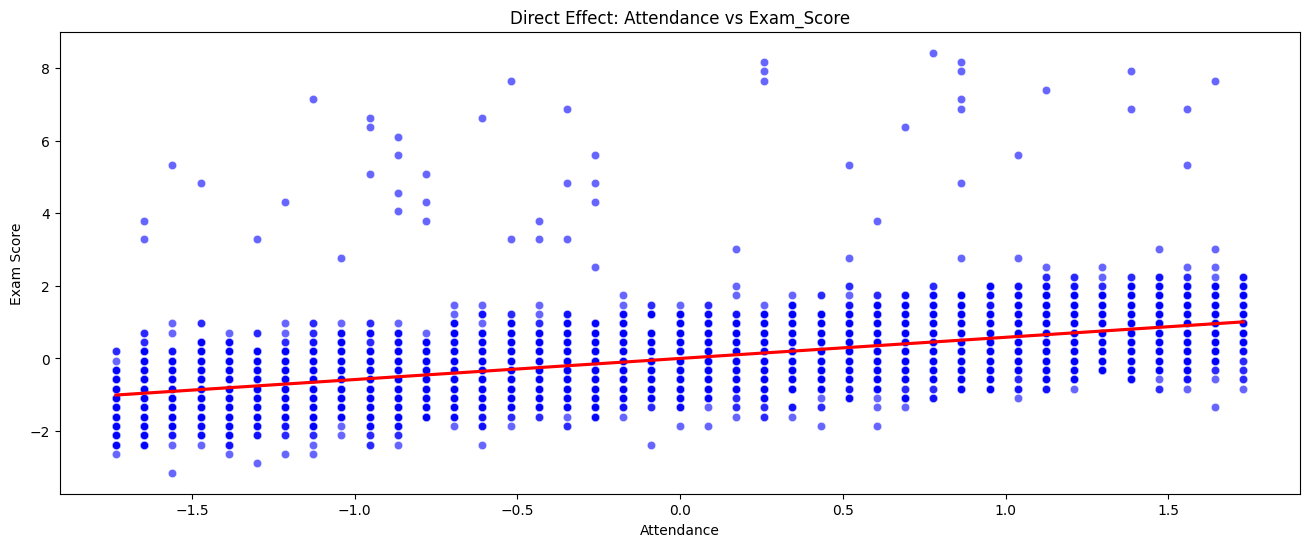

In [48]:
# Create a figure
plt.figure(figsize=(16, 6))

# Plot 1: Attendance vs Exam_Score with trend line
sns.scatterplot(
    data=data_std, x='Attendance', y='Exam_Score',  alpha=0.6, color='blue'
)
sns.regplot(
    data=data_std, x='Attendance', y='Exam_Score',  scatter=False, color='red'
)
plt.title('Direct Effect: Attendance vs Exam_Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()


a. **`Teacher_Quality` attribute**

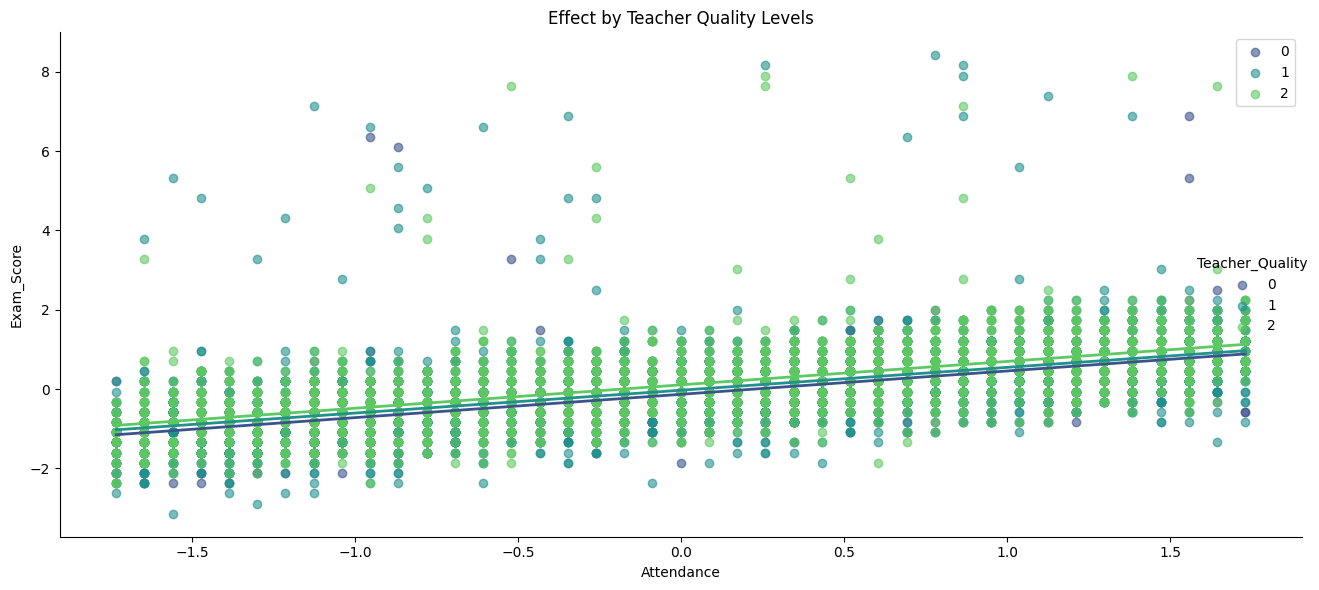

In [49]:
# Plot 2: Attendance vs Exam_Score by Teacher_Quality levels
sns.lmplot(
    data=data_std,
    x='Attendance',
    y='Exam_Score',
    hue='Teacher_Quality',
    palette='viridis',
    height=6,
    aspect=2,
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 2},
    ci=None,
)
plt.title('Effect by Teacher Quality Levels')
plt.legend()
# Adjust layout for better visibility
plt.tight_layout()
plt.show()

b. **`Motivation_Level` attribute**

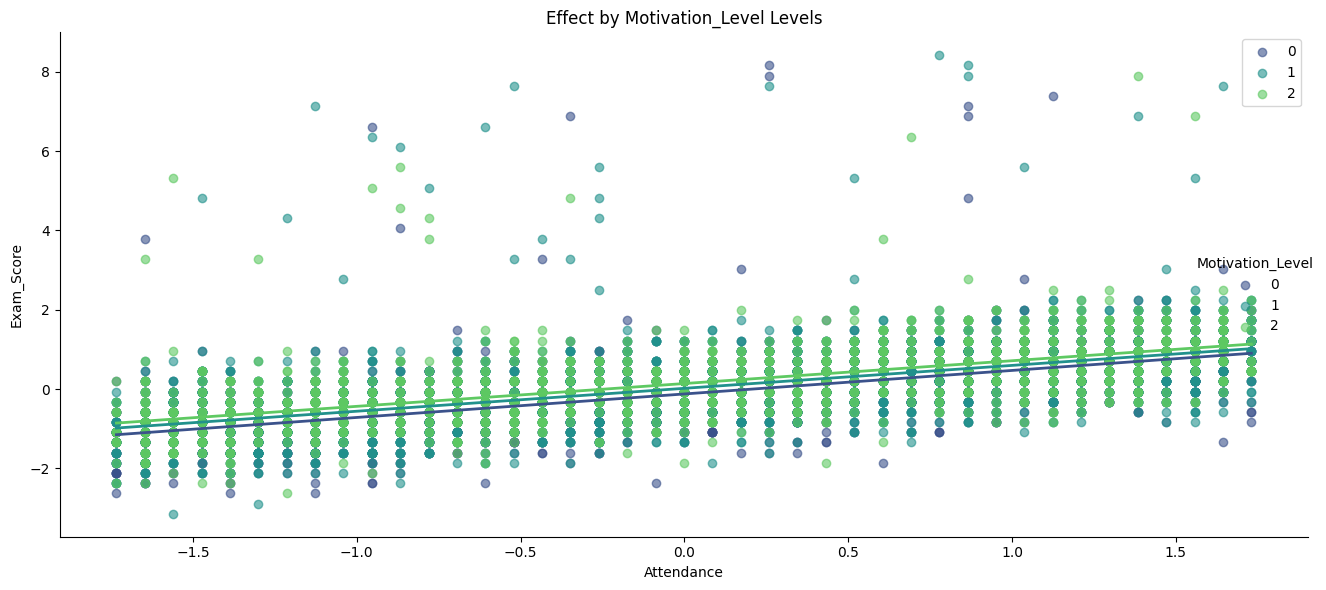

In [50]:
# Plot 3: Attendance vs Exam_Score by Motivation_Level levels
sns.lmplot(
    data=data_std,
    x='Attendance',
    y='Exam_Score',
    hue='Motivation_Level',
    palette='viridis',
    height=6,
    aspect=2,
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 2},
    ci=None,
)
plt.title('Effect by Motivation_Level Levels')
plt.legend()

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

c. **Comment**
- The visualizations support the conclusion that `Teacher_Quality` and `Motivation_Level` are not significant moderators in the relationship between `Attendance` and `Exam_Score`. 
- Changes in class attendance do not show significant differences depending on the levels of these factors. 
- Therefore, improving `Teacher_Quality` and `Motivation_Level` may improve exam scores, but it does not alter the fundamental relationship between `Attendance` and `Exam_Score`

#### **5. Interpret and Conclude**

##### **Summary of Findings:**

- **Attendance and Exam Score**: There is a strong, positive relationship between `Attendance` and `Exam_Score`, indicating that higher attendance is associated with better exam performance.
  
- **Teacher Quality**: While `Teacher_Quality` does have a significant direct effect on `Exam_Score`, the interaction between `Attendance` and `Teacher_Quality` is not significant. This suggests that `Teacher_Quality` does not moderate the relationship between attendance and exam scores, meaning the effect of attendance on exam scores is largely independent of the teacher's quality.

- **Motivation Level**: Similarly, while `Motivation_Level` also significantly affects `Exam_Score`, the interaction term between `Attendance` and `Motivation_Level` is not significant. This suggests that motivation level does not significantly moderate the relationship between attendance and exam scores.

##### **Actionable Insights:**

1. **Teacher Quality**: Since `Teacher_Quality` does not moderate the relationship between `Attendance` and `Exam_Score`, improving teacher effectiveness may still be beneficial for enhancing overall exam performance, but it may not directly influence the impact of attendance on exam scores.

2. **Motivation**: While motivation is significant in its own right, interventions targeting motivation may be more useful as standalone efforts rather than attempts to modify how attendance influences exam scores.

3. **Focus on Attendance**: Since `Attendance` is the most significant predictor of `Exam_Score`, schools and educational institutions could focus on improving attendance through interventions, such as providing incentives for high attendance or addressing factors that contribute to poor attendance.

## V. Reflection
#### Difficulties Encountered  
- All members faced difficulties due to a lack of familiarity with GitHub.  
- Problems frequently occurred during merge, pull, and push operations.  
- Conflicts arose related to commit histories, leading to delays and extra effort to resolve issues.  

#### Lessons Learned  
- Gained hands-on experience in using GitHub commands effectively, including:  
  - Resolving conflicts.  
  - Managing branches.  
  - Understanding and managing commit histories.  
- Improved teamwork and communication to minimize conflicts in future projects.  

#### Future Improvements  
- Dedicate more time to learning GitHub workflows before starting the project, such as:  
  - Attending workshops or tutorials on Git and GitHub.  
  - Practicing with smaller projects to build confidence.  
- Establish clearer guidelines for version control, including:  
  - Consistent naming conventions for branches and commits.  
  - A regular schedule for merging code to avoid last-minute conflicts.  

## VI. References

1. [Ahmed Gamal. (2024). *StudentPerformance*. Kaggle](https://www.kaggle.com/code/ahmedgmy/studentperformance/notebook)
2. [Wikipedia contributors. (2024). Moderation (statistics). *Wikipedia, The Free Encyclopedia*](https://en.wikipedia.org/wiki/Moderation_(statistics))
